In [399]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [400]:
print(np.__version__)

1.26.4


In [401]:
# file_path="/home/ara2/Desktop/Najifa_Arif_CSE491/Final_feature_matrix.csv"
file_path="/home/ara2/Desktop/Najifa_Arif_CSE491/Final_feature_matrix_with_best_label.csv"
df=pd.read_csv(file_path)
df.tail()

,grh_name(synthetic),std_degree,std_core,avg_core,nodes,density,max_degree,avg_degree,mxc_std_degree,mxc_nodes,...,sub_edge,time_1,time_2,time_3,time_4,time_5,time_6,time_7,time_8,best_label
221,as19991122_remapped,17.557157,0.169385,2.029390,12113,0.000330,1396,3.999505,18.497933,357,...,24223,0.13,0.14,0.15,0.13,0.15,0.12,0.11,0.16,7
222,as19991204_remapped,17.758524,0.162718,2.027045,12202,0.000328,1414,3.999508,17.781652,331,...,24401,0.14,0.16,0.17,0.17,0.17,0.14,0.13,0.16,7
223,as19991205_remapped,17.772972,0.123678,2.015368,12168,0.000329,1412,3.999507,13.237984,188,...,24333,0.16,0.15,0.16,0.15,0.15,0.15,0.12,0.13,7
224,as19991206_remapped,17.774585,0.123389,2.015295,12226,0.000327,1417,3.999509,13.237984,188,...,24449,0.16,0.16,0.16,0.16,0.14,0.13,0.14,0.15,6
225,as20000102_remapped,18.038514,0.161074,2.026487,12572,0.000318,1460,3.999523,17.865763,334,...,25141,0.14,0.17,0.16,0.12,0.14,0.16,0.14,0.14,5


In [402]:
zero_counts = (df==0).sum()

zero_counts = zero_counts[zero_counts>0].sort_values(ascending=False)
print(zero_counts)

min_core          179
mxc_std_degree      8
std_core            3
density             2
mxc_density         1
dtype: int64


In [403]:
df = df.drop(columns=['min_core']+ [f"time_{i}" for i in range(1,9)])

In [404]:
df.head()

,grh_name(synthetic),std_degree,std_core,avg_core,nodes,density,max_degree,avg_degree,mxc_std_degree,mxc_nodes,mxc_edges,mxc_density,mxc_max_degree,mxc_avg_degree,R,degeneracy,upper_bound,edge,sub_edge,best_label
0,scale_free_graph_m_21,35.627469,4.481167,11.176208,100001,0.000220,2064,21.95848,36.313664,38914,569787,0.000753,1447,29.284422,3,15,33,1097924,1094751,8
1,scale_free_graph_m_22,36.569533,4.760552,11.812692,100001,0.000231,2294,23.05290,36.793856,34571,531453,0.000889,1527,30.745596,3,16,35,1152645,1149598,6
2,scale_free_graph_m_23,37.870138,4.971670,12.317157,100001,0.000240,1869,24.01830,36.440907,21710,348197,0.001478,987,32.077107,3,17,37,1200915,1198092,8
3,scale_free_graph_m_24,40.186277,5.078082,12.710503,100001,0.000250,2929,25.00754,21.032882,427,6859,0.075414,212,32.126464,3,18,40,1250377,1247617,7
4,scale_free_graph_m_25_2nd_time,42.637274,5.363944,13.305678,200001,0.000130,3407,26.00868,43.207664,67449,1168793,0.000514,2260,34.657089,3,18,40,2600868,2595685,8


In [405]:
ranges = df.describe().loc[['min','max']]
print(ranges)

     std_degree  std_core   avg_core       nodes   density  max_degree  \
min    0.991553   0.00000   1.700749       172.0  0.000000         8.0   
max   86.235812   9.68351  40.998199  14487992.0  0.055964      6797.0   

     avg_degree  mxc_std_degree  mxc_nodes   mxc_edges  mxc_density  \
min    2.781657        0.000000        7.0        12.0          0.0   
max   50.000000       85.420687  8054237.0  16108470.0          1.0   

     mxc_max_degree  mxc_avg_degree    R  degeneracy  upper_bound        edge  \
min             4.0        3.255459  3.0         2.0          3.0       823.0   
max          4705.0       62.673567  3.0        41.0         91.0  28975984.0   

       sub_edge  best_label  
min       810.0         5.0  
max  28975978.0         8.0  


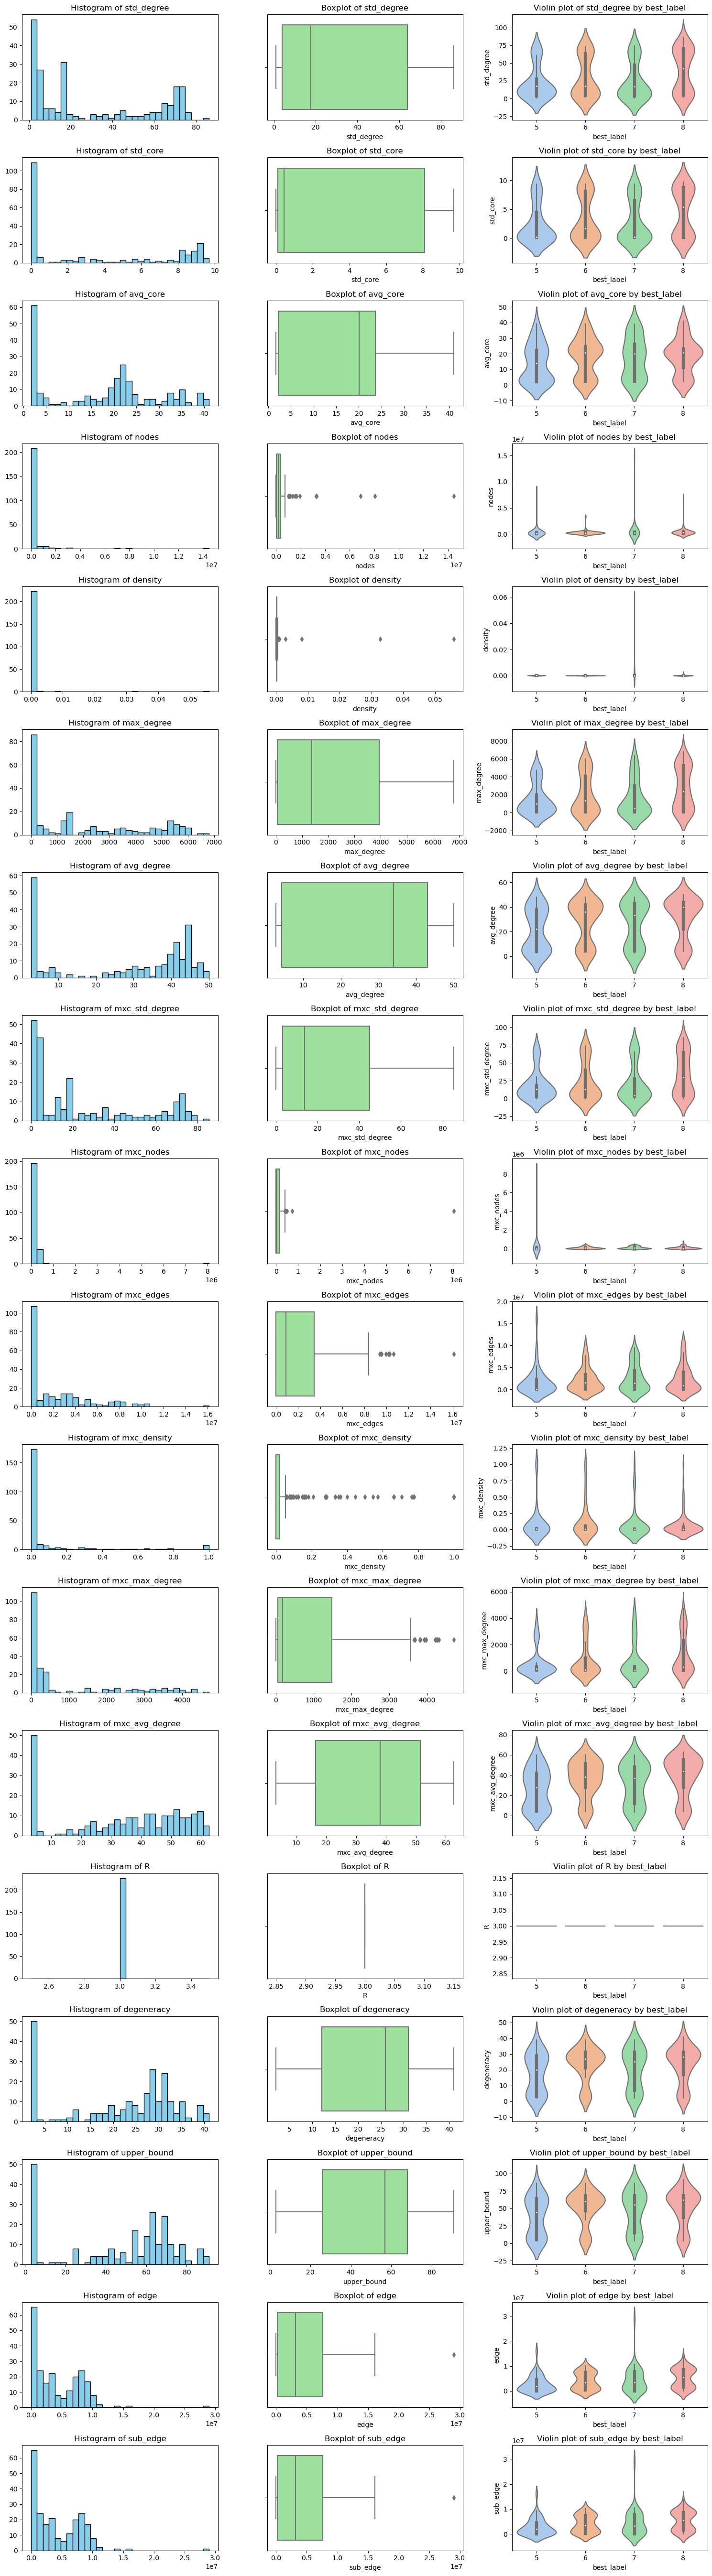

In [406]:
feature_cols_vis = df.columns.drop(['best_label', 'grh_name(synthetic)'])
n_features = len(feature_cols_vis)

fig, axes = plt.subplots(n_features, 3, figsize=(15, n_features * 3))

for i, feature in enumerate(feature_cols_vis):
    # Histogram
    axes[i, 0].hist(df[feature], bins=30, color='skyblue', edgecolor='black')
    axes[i, 0].set_title(f'Histogram of {feature}')
    
    # Boxplot
    sns.boxplot(x=df[feature], ax=axes[i, 1], color='lightgreen')
    axes[i, 1].set_title(f'Boxplot of {feature}')
    
    # Violin plot against best_label
    sns.violinplot(x='best_label', y=feature, data=df, ax=axes[i, 2], palette="pastel")
    axes[i, 2].set_title(f'Violin plot of {feature} by best_label')

plt.tight_layout()
plt.show()


In [407]:
skewed_feats = ['nodes','max_degree','mxc_nodes','mxc_edges','mxc_max_degree','edge','sub_edge']
# skewed_feats = ['std_degree','std_core','avg_core','density','max_degree','avg_degree','mxc_nodes', 
#                 'mxc_edges', 'mxc_density',
#                 'mxc_max_degree', 'mxc_avg_degree', 'R',
#                 'degeneracy', 'upper_bound']
df[skewed_feats] = df[skewed_feats].apply(lambda x: np.log1p(x))

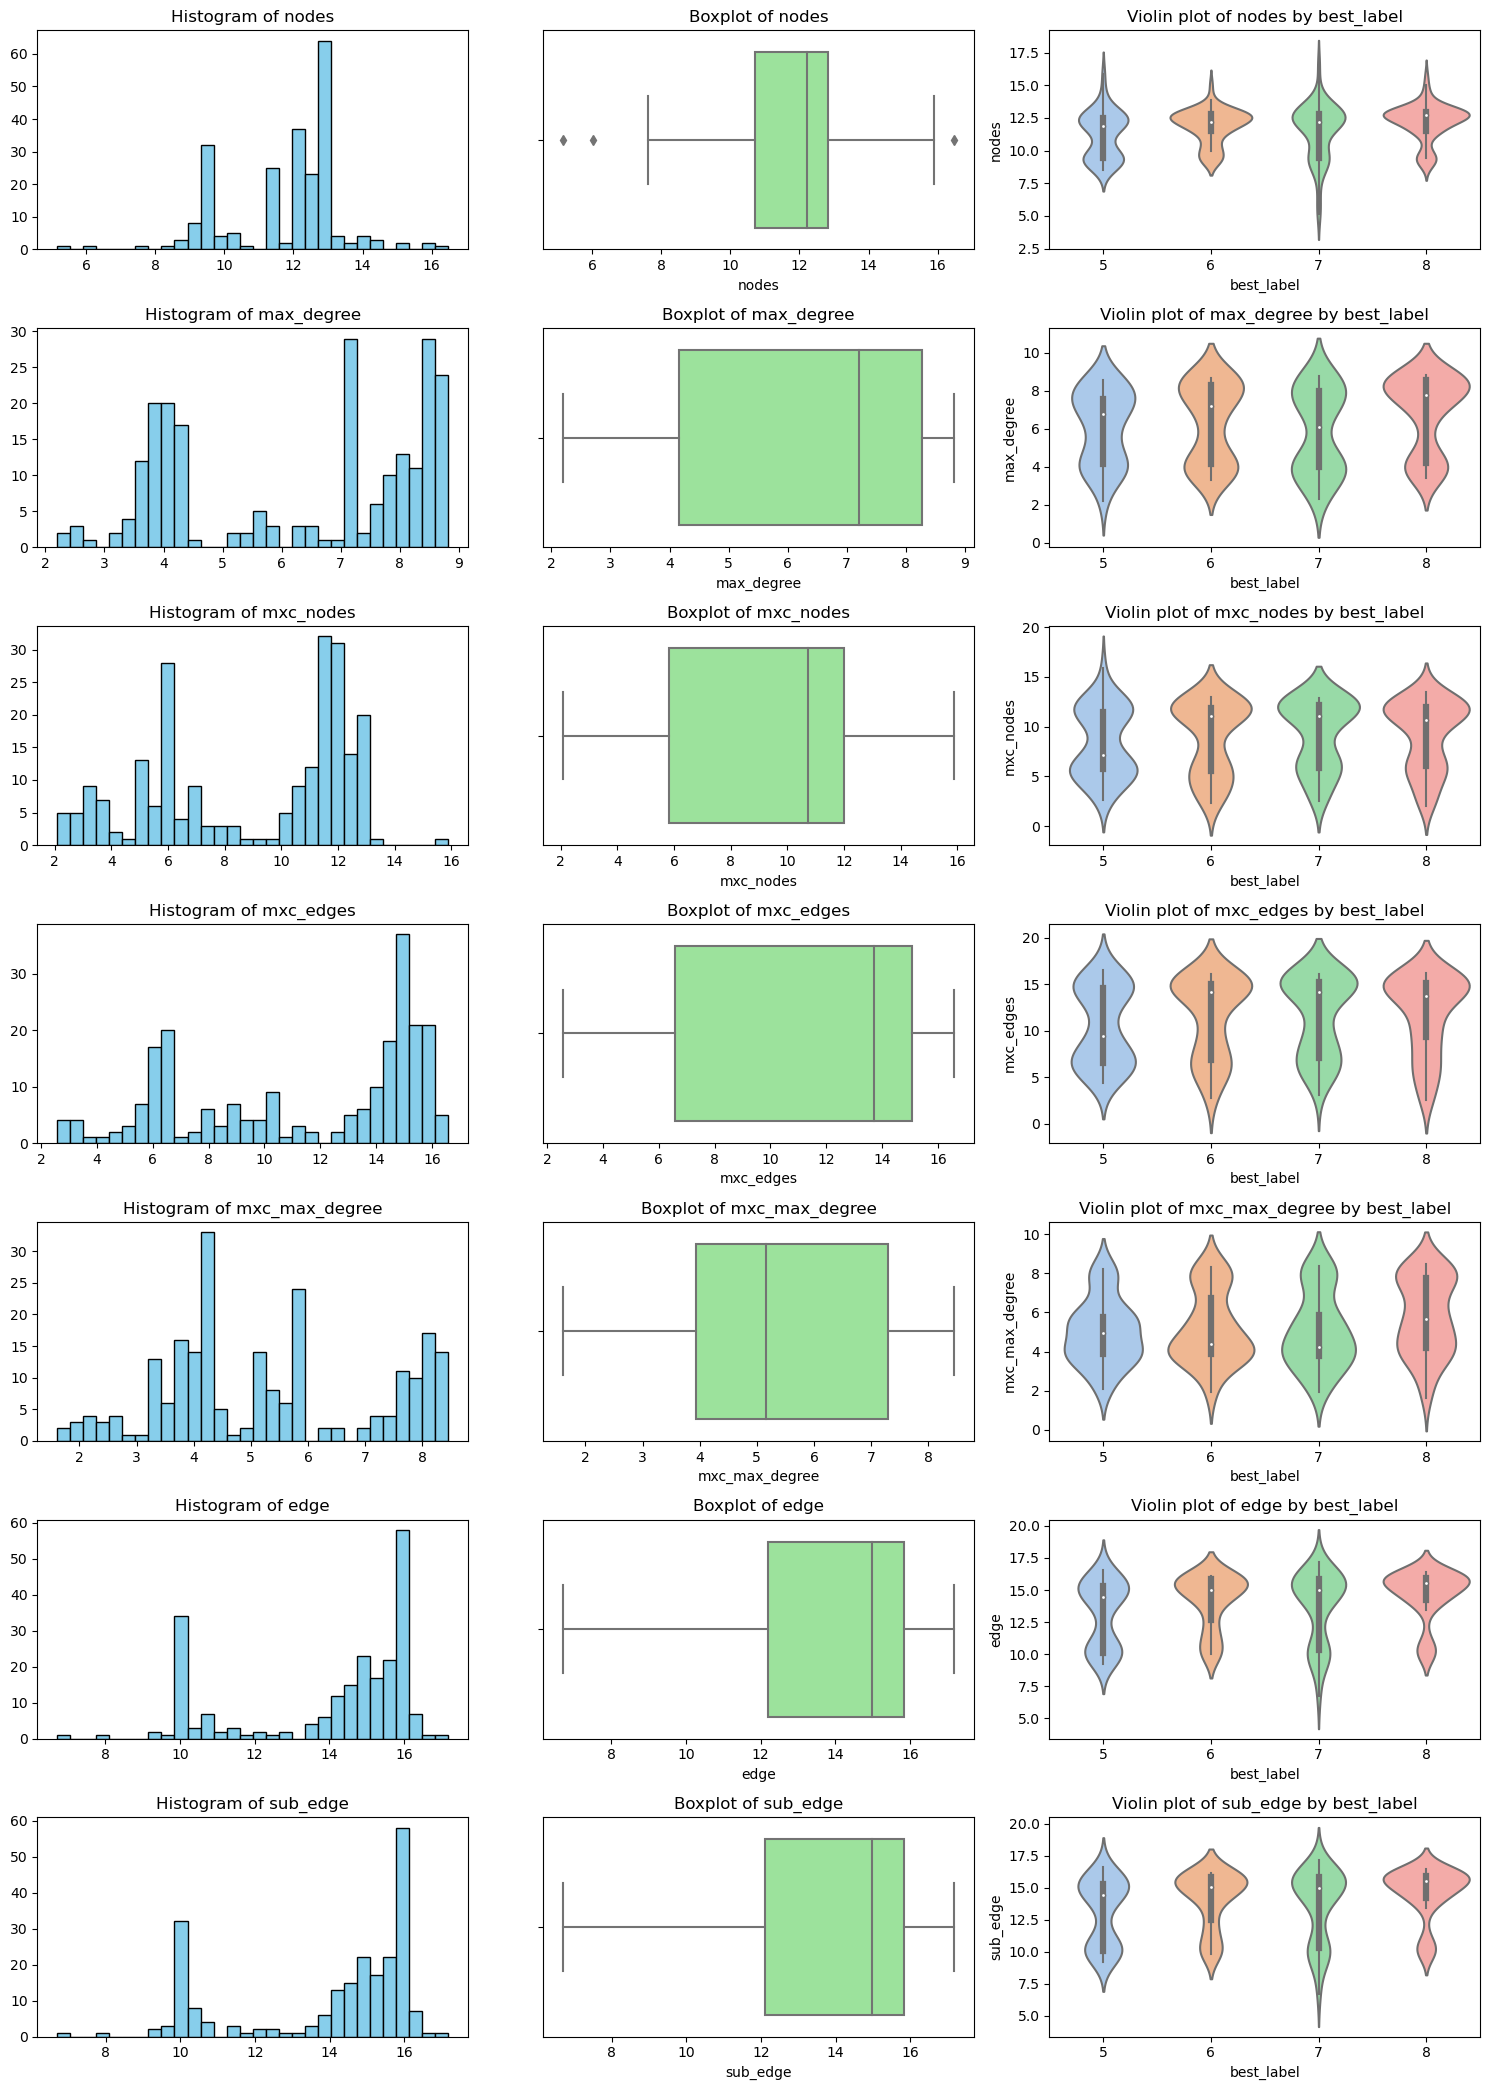

In [408]:
feature_cols_vis_2 = ['nodes','max_degree','mxc_nodes','mxc_edges','mxc_max_degree','edge','sub_edge']
# feature_cols_vis_2 = ['std_degree','std_core','avg_core','density','max_degree','avg_degree','mxc_nodes', 
#                 'mxc_edges', 'mxc_density',
#                 'mxc_max_degree', 'mxc_avg_degree', 'R',
#                 'degeneracy', 'upper_bound']
n_features = len(feature_cols_vis_2)

fig, axes = plt.subplots(n_features, 3, figsize=(15, n_features * 3))

for i, feature in enumerate(feature_cols_vis_2):
    # Histogram
    axes[i, 0].hist(df[feature], bins=30, color='skyblue', edgecolor='black')
    axes[i, 0].set_title(f'Histogram of {feature}')
    
    # Boxplot
    sns.boxplot(x=df[feature], ax=axes[i, 1], color='lightgreen')
    axes[i, 1].set_title(f'Boxplot of {feature}')
    
    # Violin plot against best_label
    sns.violinplot(x='best_label', y=feature, data=df, ax=axes[i, 2], palette="pastel")
    axes[i, 2].set_title(f'Violin plot of {feature} by best_label')

plt.tight_layout()
plt.show()


In [409]:
ranges_2 = df[['nodes','max_degree','mxc_nodes','mxc_edges','mxc_max_degree','edge','sub_edge']].describe().loc[['min','max']]
print(ranges_2)

         nodes  max_degree  mxc_nodes  mxc_edges  mxc_max_degree       edge  \
min   5.153292    2.197225   2.079442   2.564949        1.609438   6.714171   
max  16.488831    8.824384  15.901709  16.594856        8.456594  17.181978   

      sub_edge  
min   6.698268  
max  17.181978  


In [410]:
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler

# scaler = RobustScaler()
# scaler = MinMaxScaler()
scaler = StandardScaler()

features_to_trnsfrm = df.columns.drop(['grh_name(synthetic)', 'best_label'])

df[features_to_trnsfrm] = scaler.fit_transform(df[features_to_trnsfrm])


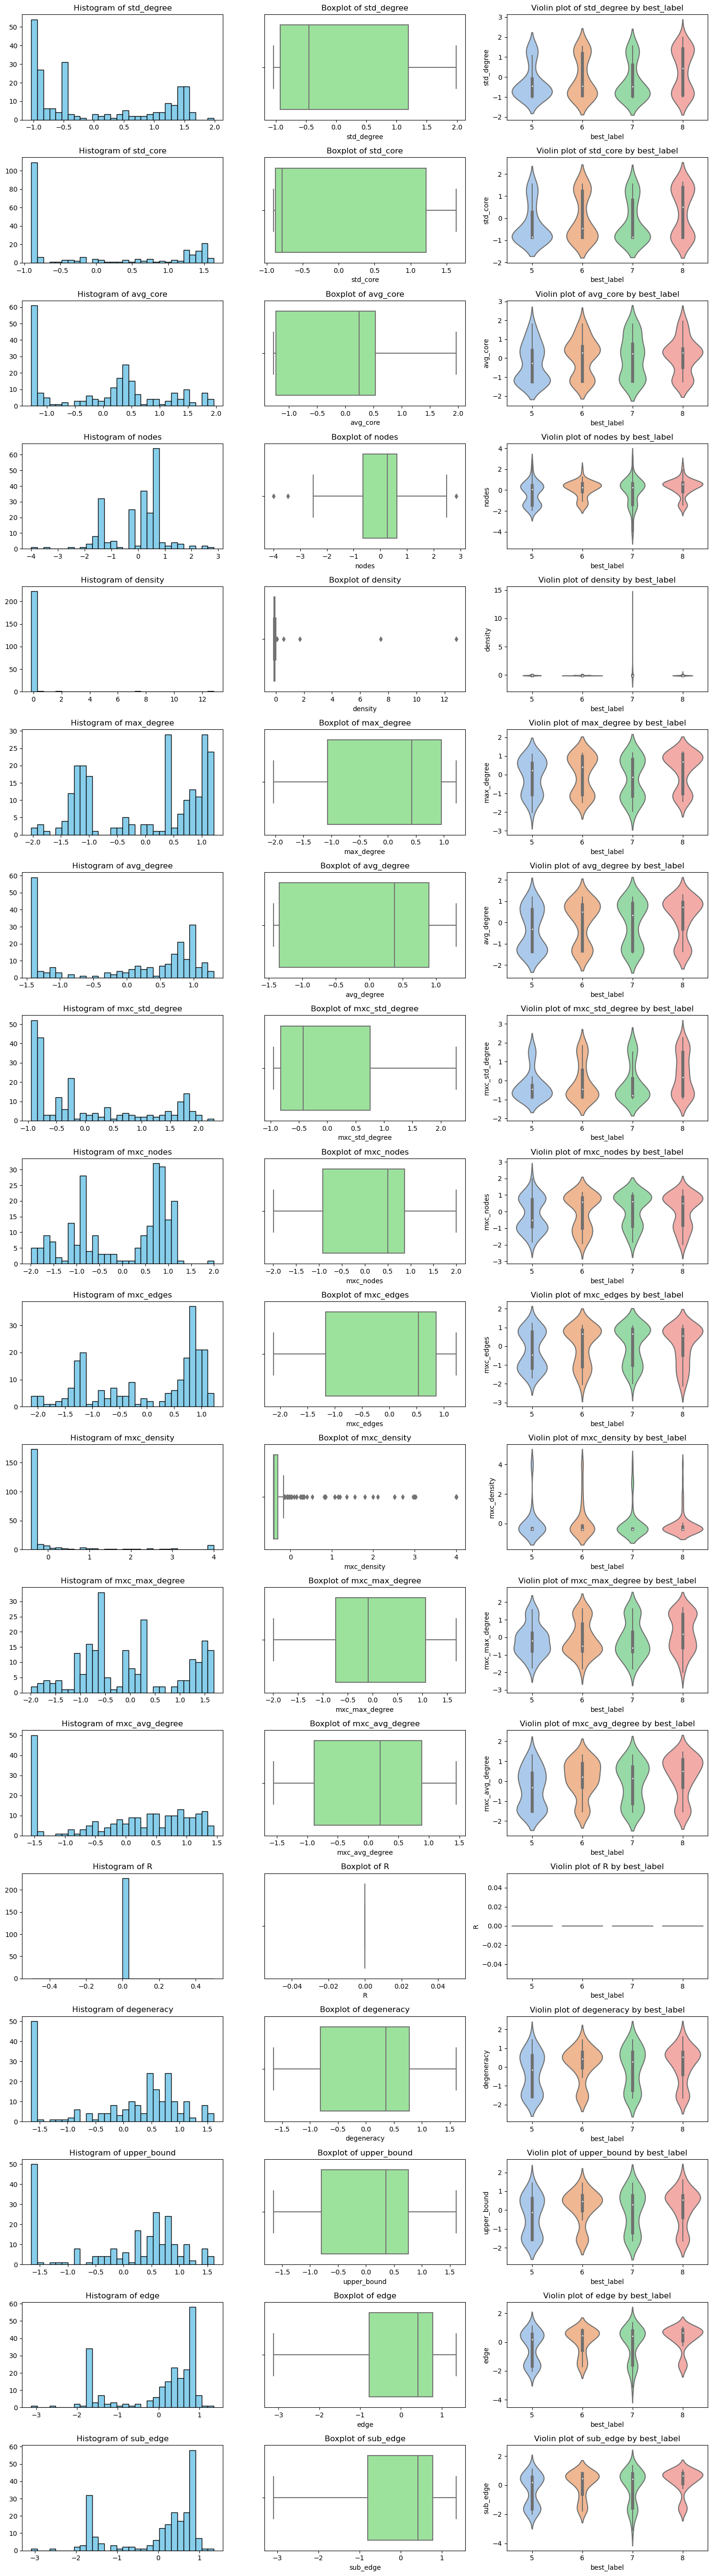

In [411]:
feature_cols_vis_3 = df.columns.drop(['best_label', 'grh_name(synthetic)'])
n_features = len(feature_cols_vis_3)

fig, axes = plt.subplots(n_features, 3, figsize=(15, n_features * 3))

for i, feature in enumerate(feature_cols_vis_3):
    # Histogram
    axes[i, 0].hist(df[feature], bins=30, color='skyblue', edgecolor='black')
    axes[i, 0].set_title(f'Histogram of {feature}')
    
    # Boxplot
    sns.boxplot(x=df[feature], ax=axes[i, 1], color='lightgreen')
    axes[i, 1].set_title(f'Boxplot of {feature}')
    
    # Violin plot against best_label
    sns.violinplot(x='best_label', y=feature, data=df, ax=axes[i, 2], palette="pastel")
    axes[i, 2].set_title(f'Violin plot of {feature} by best_label')

plt.tight_layout()
plt.show()


In [412]:
ranges_3 = df.describe().loc[['min','max']]
print(ranges_3)

     std_degree  std_core  avg_core     nodes    density  max_degree  \
min   -1.035847 -0.902592 -1.271775 -3.989300  -0.149986   -2.027657   
max    1.987974  1.634974  1.962728  2.836117  12.826088    1.218361   

     avg_degree  mxc_std_degree  mxc_nodes  mxc_edges  mxc_density  \
min   -1.429425       -0.944676  -1.988432  -2.118867    -0.403363   
max    1.304627        2.271921   1.997431   1.227847     4.004716   

     mxc_max_degree  mxc_avg_degree    R  degeneracy  upper_bound      edge  \
min       -1.988918       -1.554493  0.0   -1.650236    -1.651880 -3.119309   
max        1.681771        1.448993  0.0    1.613943     1.614759  1.356254   

     sub_edge  best_label  
min -3.088141         5.0  
max  1.351967         8.0  


In [413]:
# from sklearn.preprocessing import normalize

# features_to_norm = df.columns.drop(['grh_name(synthetic)', 'best_label'])

# X = df[features_to_norm].values

# X_norm = normalize(X, norm='l2')

# df[features_to_norm] = X_norm

In [414]:
# feature_cols_vis_4 = df.columns.drop(['best_label', 'grh_name(synthetic)'])
# n_features = len(feature_cols_vis_4)

# fig, axes = plt.subplots(n_features, 3, figsize=(15, n_features * 3))

# for i, feature in enumerate(feature_cols_vis_4):
#     # Histogram
#     axes[i, 0].hist(df[feature], bins=30, color='skyblue', edgecolor='black')
#     axes[i, 0].set_title(f'Histogram of {feature}')
    
#     # Boxplot
#     sns.boxplot(x=df[feature], ax=axes[i, 1], color='lightgreen')
#     axes[i, 1].set_title(f'Boxplot of {feature}')
    
#     # Violin plot against best_label
#     sns.violinplot(x='best_label', y=feature, data=df, ax=axes[i, 2], palette="pastel")
#     axes[i, 2].set_title(f'Violin plot of {feature} by best_label')

# plt.tight_layout()
# plt.show()


In [415]:
# df_class = df.copy()

# def best_ordering(row):
#     subset={f"l={i}":row[f"time_{i}"] for i in range(5,9)}
#     return min(subset, key=subset.get).replace("l=","")

# df_class["best_label"]=df_class.apply(best_ordering, axis=1).astype(int)

In [416]:
# df_class.head()

In [417]:
# df_class.to_csv("/home/ara2/Desktop/Najifa_Arif_CSE491/Final_feature_matrix_with_best_label.csv", index=False)

In [418]:
from sklearn.model_selection import train_test_split

In [419]:
synth_df = df.loc[:145]
real_df = df.loc[146:]

In [420]:
synth_df

,grh_name(synthetic),std_degree,std_core,avg_core,nodes,density,max_degree,avg_degree,mxc_std_degree,mxc_nodes,mxc_edges,mxc_density,mxc_max_degree,mxc_avg_degree,R,degeneracy,upper_bound,edge,sub_edge,best_label
0,scale_free_graph_m_21,0.192773,0.271699,-0.491867,-0.159990,-0.098975,0.634759,-0.319042,0.422749,0.459701,0.430680,-0.400043,1.049906,-0.238772,0.0,-0.562177,-0.538253,-0.043152,-0.035474,8
1,scale_free_graph_m_22,0.226191,0.344912,-0.439479,-0.159990,-0.096425,0.686484,-0.255673,0.440831,0.425577,0.414067,-0.399444,1.078735,-0.164913,0.0,-0.478480,-0.464011,-0.022357,-0.014770,6
2,scale_free_graph_m_23,0.272326,0.400236,-0.397957,-0.159990,-0.094338,0.586174,-0.199774,0.427541,0.291423,0.313200,-0.396847,0.844983,-0.097607,0.0,-0.394783,-0.389769,-0.004817,0.002730,8
3,scale_free_graph_m_24,0.354485,0.428121,-0.365582,-0.159990,-0.092019,0.806128,-0.142495,-0.152663,-0.840830,-0.623567,-0.070932,0.022412,-0.095112,0.0,-0.311086,-0.278407,0.012440,0.019884,7
4,scale_free_graph_m_25_2nd_time,0.441428,0.503031,-0.316594,0.257365,-0.119843,0.880149,-0.084526,0.682349,0.618304,0.602064,-0.401097,1.288800,0.032807,0.0,-0.311086,-0.278407,0.325581,0.330165,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,scale_free_graph_m_45_1_n_438981_5th_time,1.593561,1.559369,0.497117,0.730716,-0.125640,1.218361,1.070246,1.967338,0.875478,0.950480,-0.401723,1.681771,1.374894,0.0,0.776974,0.760978,0.905050,0.904743,8
142,scale_free_graph_m_46_1_n_343744_5th_time,1.639960,1.634974,0.546147,0.583462,-0.118220,1.122794,1.128870,1.994984,0.779984,0.877131,-0.401026,1.550078,1.448993,0.0,0.860671,0.872341,0.809806,0.810410,8
143,small_world_graph_m_46_1_p_0.27_n_413968_5th_time,-0.954687,-0.882404,1.633509,0.695391,-0.124249,-1.074539,1.073017,-0.821751,1.141191,1.102001,-0.402873,-0.630630,0.604734,0.0,1.279155,1.280671,0.880412,0.880610,7
144,small_world_graph_m_47_1_p_0.28_n_409896_5th_time,-0.952980,-0.880802,1.633465,0.689439,-0.124017,-1.051754,1.073017,-0.820126,1.138231,1.099504,-0.402869,-0.605691,0.604253,0.0,1.279155,1.280671,0.876185,0.876423,5


In [421]:
real_train, real_test = train_test_split(
        real_df,
        test_size = 0.2,
        random_state=20,
        stratify=real_df['best_label']
)
synth_train, synth_test = train_test_split(
    synth_df,
    test_size = 0.3,
    random_state=20,
    stratify=synth_df['best_label']
)

In [422]:
print(f"real_train: {real_train.shape}\n"
      f"real_test: {real_test.shape}\n"
      f"synth_train: {synth_train.shape}\n"
      f"synth_test: {synth_test.shape}")

real_train: (64, 20)
real_test: (16, 20)
synth_train: (102, 20)
synth_test: (44, 20)


In [423]:
print("Real Train label distribution:")
print(real_train['best_label'].value_counts().sort_index())

print("\nReal Test label distribution:")
print(real_test['best_label'].value_counts().sort_index())

print("\nSynthetic Train label distribution:")
print(synth_train['best_label'].value_counts().sort_index())

print("\nSynthetic Test label distribution:")
print(synth_test['best_label'].value_counts().sort_index())

Real Train label distribution:
5    19
6    15
7    15
8    15
Name: best_label, dtype: int64

Real Test label distribution:
5    4
6    4
7    4
8    4
Name: best_label, dtype: int64

Synthetic Train label distribution:
5    16
6    28
7    20
8    38
Name: best_label, dtype: int64

Synthetic Test label distribution:
5     7
6    12
7     9
8    16
Name: best_label, dtype: int64


In [424]:
train_df = pd.concat([real_train, synth_train], ignore_index = True)
test_df = pd.concat([real_test, synth_test], ignore_index=True)

In [425]:
print(f"train_df: {train_df.shape},'\ntest_df: {test_df.shape}'")

train_df: (166, 20),'
test_df: (60, 20)'


In [426]:
# 'std_degree','std_core','avg_core','nodes','density','max_degree','avg_degree','mxc_nodes', 'mxc_edges', 
# 'mxc_density','mxc_max_degree', 'mxc_avg_degree', 'R', 'min_core',
# 'degeneracy', 'upper_bound', 'edge', 'sub_edge', 'best_label'

feature_cols = ['std_degree','std_core','avg_core','density','max_degree','avg_degree','mxc_nodes', 
                'mxc_edges', 'mxc_density',
                'mxc_max_degree', 'mxc_avg_degree', 'R',
                'degeneracy', 'upper_bound']

X_train = train_df[feature_cols]
y_train = train_df['best_label']

X_test = test_df[feature_cols]
y_test = test_df['best_label']

print(f"X_train: {X_train.shape},'\n'X_test: {X_test.shape}")

X_train: (166, 14),'
'X_test: (60, 14)


In [427]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, classification_report, confusion_matrix, RocCurveDisplay
from sklearn.preprocessing import label_binarize

In [457]:
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_jobs=12),
    "SVM": SVC(probability=True),
    "Linear SVM": LinearSVC(max_iter=3000),
    "Logistic Regression": LogisticRegression(max_iter=1000, n_jobs=12),
    "KNN": KNeighborsClassifier(n_neighbors=5, n_jobs=12),
    "CatBoost": CatBoostClassifier(verbose=0, thread_count=12)
}


==== Training OVR for label = 5 ====

Decision Tree Report for label=5:
              precision    recall  f1-score   support

           0     0.7917    0.7755    0.7835        49
           1     0.0833    0.0909    0.0870        11

    accuracy                         0.6500        60
   macro avg     0.4375    0.4332    0.4352        60
weighted avg     0.6618    0.6500    0.6558        60


Random Forest Report for label=5:
              precision    recall  f1-score   support

           0     0.8000    0.8980    0.8462        49
           1     0.0000    0.0000    0.0000        11

    accuracy                         0.7333        60
   macro avg     0.4000    0.4490    0.4231        60
weighted avg     0.6533    0.7333    0.6910        60


Linear SVM Report for label=5:
              precision    recall  f1-score   support

           0     0.8136    0.9796    0.8889        49
           1     0.0000    0.0000    0.0000        11

    accuracy                         0.800

/home/ara2/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ara2/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ara2/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ara2/anaconda3/lib/python3.9/site-packages/sklearn/m


CatBoost Report for label=5:
              precision    recall  f1-score   support

           0     0.8036    0.9184    0.8571        49
           1     0.0000    0.0000    0.0000        11

    accuracy                         0.7500        60
   macro avg     0.4018    0.4592    0.4286        60
weighted avg     0.6562    0.7500    0.7000        60



<Figure size 640x480 with 0 Axes>

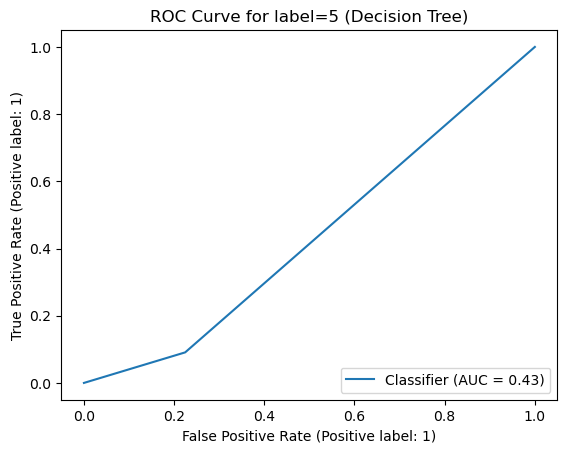


==== Training OVR for label = 6 ====

Decision Tree Report for label=6:
              precision    recall  f1-score   support

           0     0.7297    0.6136    0.6667        44
           1     0.2609    0.3750    0.3077        16

    accuracy                         0.5500        60
   macro avg     0.4953    0.4943    0.4872        60
weighted avg     0.6047    0.5500    0.5709        60


Random Forest Report for label=6:
              precision    recall  f1-score   support

           0     0.7358    0.8864    0.8041        44
           1     0.2857    0.1250    0.1739        16

    accuracy                         0.6833        60
   macro avg     0.5108    0.5057    0.4890        60
weighted avg     0.6158    0.6833    0.6361        60


Linear SVM Report for label=6:
              precision    recall  f1-score   support

           0     0.7458    1.0000    0.8544        44
           1     1.0000    0.0625    0.1176        16

    accuracy                         0.750

/home/ara2/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ara2/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ara2/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ara2/anaconda3/lib/python3.9/site-packages/sklearn/m


CatBoost Report for label=6:
              precision    recall  f1-score   support

           0     0.7500    0.9545    0.8400        44
           1     0.5000    0.1250    0.2000        16

    accuracy                         0.7333        60
   macro avg     0.6250    0.5398    0.5200        60
weighted avg     0.6833    0.7333    0.6693        60



<Figure size 640x480 with 0 Axes>

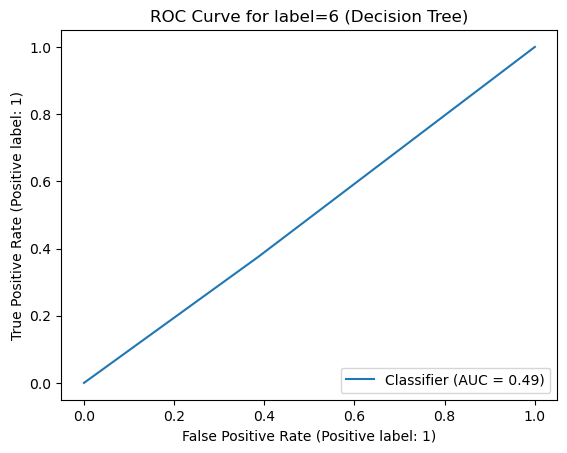


==== Training OVR for label = 7 ====

Decision Tree Report for label=7:
              precision    recall  f1-score   support

           0     0.8182    0.7660    0.7912        47
           1     0.3125    0.3846    0.3448        13

    accuracy                         0.6833        60
   macro avg     0.5653    0.5753    0.5680        60
weighted avg     0.7086    0.6833    0.6945        60


Random Forest Report for label=7:
              precision    recall  f1-score   support

           0     0.8070    0.9787    0.8846        47
           1     0.6667    0.1538    0.2500        13

    accuracy                         0.8000        60
   macro avg     0.7368    0.5663    0.5673        60
weighted avg     0.7766    0.8000    0.7471        60


Linear SVM Report for label=7:
              precision    recall  f1-score   support

           0     0.7833    1.0000    0.8785        47
           1     0.0000    0.0000    0.0000        13

    accuracy                         0.783

/home/ara2/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ara2/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ara2/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ara2/anaconda3/lib/python3.9/site-packages/sklearn/m


CatBoost Report for label=7:
              precision    recall  f1-score   support

           0     0.7797    0.9787    0.8679        47
           1     0.0000    0.0000    0.0000        13

    accuracy                         0.7667        60
   macro avg     0.3898    0.4894    0.4340        60
weighted avg     0.6107    0.7667    0.6799        60



<Figure size 640x480 with 0 Axes>

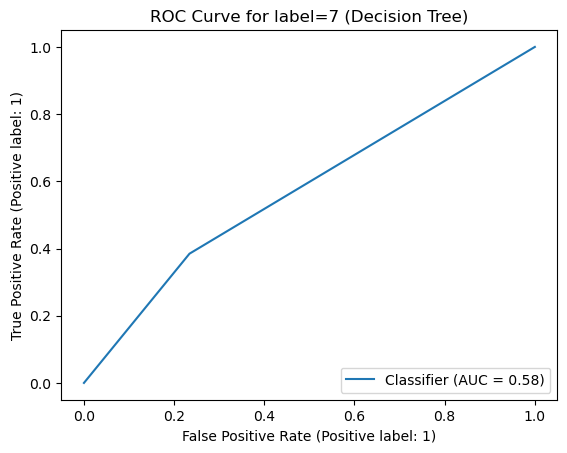


==== Training OVR for label = 8 ====

Decision Tree Report for label=8:
              precision    recall  f1-score   support

           0     0.7000    0.7000    0.7000        40
           1     0.4000    0.4000    0.4000        20

    accuracy                         0.6000        60
   macro avg     0.5500    0.5500    0.5500        60
weighted avg     0.6000    0.6000    0.6000        60


Random Forest Report for label=8:
              precision    recall  f1-score   support

           0     0.7273    0.8000    0.7619        40
           1     0.5000    0.4000    0.4444        20

    accuracy                         0.6667        60
   macro avg     0.6136    0.6000    0.6032        60
weighted avg     0.6515    0.6667    0.6561        60


Linear SVM Report for label=8:
              precision    recall  f1-score   support

           0     0.7059    0.9000    0.7912        40
           1     0.5556    0.2500    0.3448        20

    accuracy                         0.683

/home/ara2/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)



CatBoost Report for label=8:
              precision    recall  f1-score   support

           0     0.7556    0.8500    0.8000        40
           1     0.6000    0.4500    0.5143        20

    accuracy                         0.7167        60
   macro avg     0.6778    0.6500    0.6571        60
weighted avg     0.7037    0.7167    0.7048        60



<Figure size 640x480 with 0 Axes>

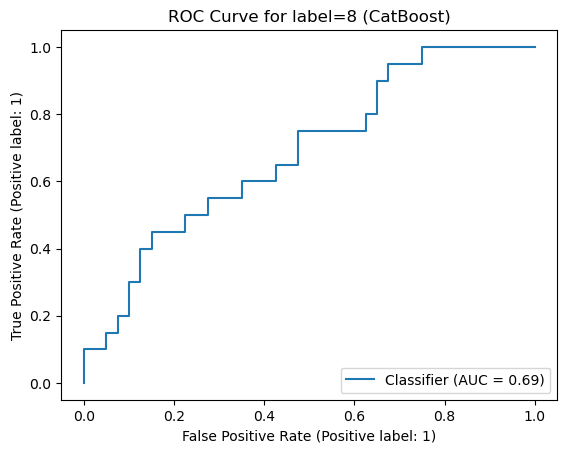

In [338]:
best_models = []

# Binarize labels for ROC plotting
y_test_binarized = label_binarize(y_test, classes=[5,6,7,8])

for i, ordering in enumerate([5, 6, 7, 8]):
    # One-vs-Rest labels
    y_train_bin = (y_train == ordering).astype(int)
    y_test_bin = (y_test == ordering).astype(int)
    
    best_acc = 0
    best_f1 = 0
    best_precision = 0
    best_recall = 0
    best_auc = 0
    best_model_name = ""
    best_model_instance = None
    
    print(f"\n==== Training OVR for label = {ordering} ====")
    
    for name, model in models.items():
        model.fit(X_train, y_train_bin)
        
        # Predictions
        y_pred = model.predict(X_test)
        
        # For AUC-ROC, need probabilities if possible
        if hasattr(model, "predict_proba"):
            y_score = model.predict_proba(X_test)[:,1]
        elif hasattr(model, "decision_function"):
            y_score = model.decision_function(X_test)
        else:
            y_score = y_pred  # fallback (0/1)
        
        # Metrics
        acc = accuracy_score(y_test_bin, y_pred)
        f1 = f1_score(y_test_bin, y_pred)
        precision = precision_score(y_test_bin, y_pred)
        recall = recall_score(y_test_bin, y_pred)
        try:
            auc = roc_auc_score(y_test_bin, y_score)
        except:
            auc = 0
        
        print(f"\n{name} Report for label={ordering}:")
        print(classification_report(y_test_bin, y_pred, digits=4))
        
        # Save best model based on F1
        if f1 > best_f1:
            best_acc = acc
            best_f1 = f1
            best_precision = precision
            best_recall = recall
            best_auc = auc
            best_model_name = name
            best_model_instance = model
    
    best_models.append({
        "Ordering (l)": ordering,
        "Best Model": best_model_name,
        "Accuracy": best_acc,
        "F1-score": best_f1,
        "Precision": best_precision,
        "Recall": best_recall,
        "AUC-ROC": best_auc
    })
    
    # Plot ROC curve for the best model
    plt.figure()
    if hasattr(best_model_instance, "predict_proba"):
        y_score = best_model_instance.predict_proba(X_test)[:,1]
    elif hasattr(best_model_instance, "decision_function"):
        y_score = best_model_instance.decision_function(X_test)
    else:
        y_score = best_model_instance.predict(X_test)
    
    RocCurveDisplay.from_predictions(y_test_bin, y_score)
    plt.title(f"ROC Curve for label={ordering} ({best_model_name})")
    plt.show()


In [339]:
summary_df = pd.DataFrame(best_models)
print(summary_df)

   Ordering (l)     Best Model  Accuracy  F1-score  Precision    Recall  \
0             5  Decision Tree  0.650000  0.086957   0.083333  0.090909   
1             6  Decision Tree  0.550000  0.307692   0.260870  0.375000   
2             7  Decision Tree  0.683333  0.344828   0.312500  0.384615   
3             8       CatBoost  0.716667  0.514286   0.600000  0.450000   

    AUC-ROC  
0  0.433210  
1  0.494318  
2  0.575286  
3  0.685000  


In [340]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

boost_model = AdaBoostClassifier(n_estimators=1000, random_state=42)
# boost_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

best_models = []

classes = [5,6,7,8]

for ordering in classes:
    # One-vs-Rest labels
    y_train_bin = (y_train == ordering).astype(int)
    y_test_bin = (y_test == ordering).astype(int)
    
    print(f"\n==== Training OVR for label = {ordering} ====")
    
    # Train boosting model
    boost_model.fit(X_train, y_train_bin)
    y_pred = boost_model.predict(X_test)
    y_prob = boost_model.predict_proba(X_test)[:,1]  # probability for positive class
    
    # Evaluation metrics
    acc = accuracy_score(y_test_bin, y_pred)
    f1 = f1_score(y_test_bin, y_pred)
    precision = precision_score(y_test_bin, y_pred)
    recall = recall_score(y_test_bin, y_pred)
    auc_roc = roc_auc_score(y_test_bin, y_prob)
    
    print(f"\nClassification Report for label={ordering}:")
    print(classification_report(y_test_bin, y_pred, digits=4))
    
    best_models.append({
        "Ordering (l)": ordering,
        "Model": "AdaBoost",  # or GradientBoosting
        "Accuracy": acc,
        "F1-score": f1,
        "Precision": precision,
        "Recall": recall,
        "AUC-ROC": auc_roc
    })
    



==== Training OVR for label = 5 ====

Classification Report for label=5:
              precision    recall  f1-score   support

           0     0.8367    0.8367    0.8367        49
           1     0.2727    0.2727    0.2727        11

    accuracy                         0.7333        60
   macro avg     0.5547    0.5547    0.5547        60
weighted avg     0.7333    0.7333    0.7333        60


==== Training OVR for label = 6 ====

Classification Report for label=6:
              precision    recall  f1-score   support

           0     0.7708    0.8409    0.8043        44
           1     0.4167    0.3125    0.3571        16

    accuracy                         0.7000        60
   macro avg     0.5938    0.5767    0.5807        60
weighted avg     0.6764    0.7000    0.6851        60


==== Training OVR for label = 7 ====

Classification Report for label=7:
              precision    recall  f1-score   support

           0     0.8163    0.8511    0.8333        47
           1   

In [345]:
# Summary dataframe
import pandas as pd
summary_df = pd.DataFrame(best_models)
print("\n=== Summary ===")
print(summary_df)



=== Summary ===
   Ordering (l)             Model  Accuracy  F1-score  Precision    Recall  \
0             5  GradientBoosting  0.750000  0.347826   0.333333  0.363636   
1             6  GradientBoosting  0.650000  0.222222   0.272727  0.187500   
2             7  GradientBoosting  0.766667  0.363636   0.444444  0.307692   
3             8  GradientBoosting  0.633333  0.421053   0.444444  0.400000   

    AUC-ROC  
0  0.597403  
1  0.564631  
2  0.630115  
3  0.692500  


In [346]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt


boost_model = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.1, random_state=42)

best_models = []

classes = [5,6,7,8]

for ordering in classes:
    # One-vs-Rest labels
    y_train_bin = (y_train == ordering).astype(int)
    y_test_bin = (y_test == ordering).astype(int)
    
    print(f"\n==== Training OVR for label = {ordering} ====")
    
    # Train boosting model
    boost_model.fit(X_train, y_train_bin)
    y_pred = boost_model.predict(X_test)
    y_prob = boost_model.predict_proba(X_test)[:,1] 
    
    # Evaluation metrics
    acc = accuracy_score(y_test_bin, y_pred)
    f1 = f1_score(y_test_bin, y_pred)
    precision = precision_score(y_test_bin, y_pred)
    recall = recall_score(y_test_bin, y_pred)
    auc_roc = roc_auc_score(y_test_bin, y_prob)
    
    print(f"\nClassification Report for label={ordering}:")
    print(classification_report(y_test_bin, y_pred, digits=4))
    
    best_models.append({
        "Ordering (l)": ordering,
        "Model": "GradientBoosting", 
        "Accuracy": acc,
        "F1-score": f1,
        "Precision": precision,
        "Recall": recall,
        "AUC-ROC": auc_roc
    })
    



==== Training OVR for label = 5 ====

Classification Report for label=5:
              precision    recall  f1-score   support

           0     0.8542    0.8367    0.8454        49
           1     0.3333    0.3636    0.3478        11

    accuracy                         0.7500        60
   macro avg     0.5938    0.6002    0.5966        60
weighted avg     0.7587    0.7500    0.7541        60


==== Training OVR for label = 6 ====

Classification Report for label=6:
              precision    recall  f1-score   support

           0     0.7347    0.8182    0.7742        44
           1     0.2727    0.1875    0.2222        16

    accuracy                         0.6500        60
   macro avg     0.5037    0.5028    0.4982        60
weighted avg     0.6115    0.6500    0.6270        60


==== Training OVR for label = 7 ====

Classification Report for label=7:
              precision    recall  f1-score   support

           0     0.8235    0.8936    0.8571        47
           1   

In [347]:
# Summary dataframe
import pandas as pd
summary_df = pd.DataFrame(best_models)
print("\n=== Summary ===")
print(summary_df)



=== Summary ===
   Ordering (l)             Model  Accuracy  F1-score  Precision    Recall  \
0             5  GradientBoosting  0.750000  0.347826   0.333333  0.363636   
1             6  GradientBoosting  0.650000  0.222222   0.272727  0.187500   
2             7  GradientBoosting  0.766667  0.363636   0.444444  0.307692   
3             8  GradientBoosting  0.633333  0.421053   0.444444  0.400000   

    AUC-ROC  
0  0.597403  
1  0.564631  
2  0.630115  
3  0.692500  


In [349]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, classification_report
import pandas as pd

# Base estimator for bagging
base_estimator = DecisionTreeClassifier(class_weight='balanced', random_state=42)

bag_results = []
classes = [5,6,7,8]

for ordering in classes:
    y_train_bin = (y_train == ordering).astype(int)
    y_test_bin = (y_test == ordering).astype(int)
    
    print(f"\n==== Training Bagging OVR for label = {ordering} ====")
    
    # Bagging classifier
    bag_clf = BaggingClassifier(base_estimator=base_estimator, n_estimators=50, n_jobs=1, random_state=42)
    bag_clf.fit(X_train, y_train_bin)
    
    y_pred = bag_clf.predict(X_test)
    y_prob = bag_clf.predict_proba(X_test)[:,1]
    
    acc = accuracy_score(y_test_bin, y_pred)
    f1 = f1_score(y_test_bin, y_pred)
    precision = precision_score(y_test_bin, y_pred)
    recall = recall_score(y_test_bin, y_pred)
    auc_roc = roc_auc_score(y_test_bin, y_prob)
    
    print(classification_report(y_test_bin, y_pred, digits=4))
    
    bag_results.append({
        "Ordering (l)": ordering,
        "Model": "Bagging",
        "Accuracy": acc,
        "F1-score": f1,
        "Precision": precision,
        "Recall": recall,
        "AUC-ROC": auc_roc
    })



==== Training Bagging OVR for label = 5 ====
              precision    recall  f1-score   support

           0     0.8182    0.9184    0.8654        49
           1     0.2000    0.0909    0.1250        11

    accuracy                         0.7667        60
   macro avg     0.5091    0.5046    0.4952        60
weighted avg     0.7048    0.7667    0.7296        60


==== Training Bagging OVR for label = 6 ====
              precision    recall  f1-score   support

           0     0.7358    0.8864    0.8041        44
           1     0.2857    0.1250    0.1739        16

    accuracy                         0.6833        60
   macro avg     0.5108    0.5057    0.4890        60
weighted avg     0.6158    0.6833    0.6361        60


==== Training Bagging OVR for label = 7 ====
              precision    recall  f1-score   support

           0     0.7895    0.9574    0.8654        47
           1     0.3333    0.0769    0.1250        13

    accuracy                         0.7667 

In [350]:
bag_summary_df = pd.DataFrame(bag_results)
print("\n=== Bagging Summary ===")
print(bag_summary_df)


=== Bagging Summary ===
   Ordering (l)    Model  Accuracy  F1-score  Precision    Recall   AUC-ROC
0             5  Bagging  0.766667  0.125000   0.200000  0.090909  0.598330
1             6  Bagging  0.683333  0.173913   0.285714  0.125000  0.554688
2             7  Bagging  0.766667  0.125000   0.333333  0.076923  0.551555
3             8  Bagging  0.633333  0.388889   0.437500  0.350000  0.636250


In [352]:
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, classification_report
import pandas as pd

# Prepare storage
bag_results = []

classes = [5, 6, 7, 8]

for ordering in classes:
    # OVR labels
    y_train_bin = (y_train == ordering).astype(int)
    y_test_bin = (y_test == ordering).astype(int)
    
    print(f"\n==== Training Balanced Bagging OVR for label = {ordering} ====")
    
    # Balanced Bagging with Decision Tree as base estimator
    bbag_clf = BalancedBaggingClassifier(
        estimator=DecisionTreeClassifier(),
        sampling_strategy='auto',   # balance positive/negative in bootstrap
        replacement=True,
        random_state=42,
        n_estimators=50,
        n_jobs=1
    )
    
    # Fit
    bbag_clf.fit(X_train, y_train_bin)
    y_pred = bbag_clf.predict(X_test)
    y_prob = bbag_clf.predict_proba(X_test)[:,1]
    
    # Metrics
    acc = accuracy_score(y_test_bin, y_pred)
    f1 = f1_score(y_test_bin, y_pred)
    precision = precision_score(y_test_bin, y_pred)
    recall = recall_score(y_test_bin, y_pred)
    auc_roc = roc_auc_score(y_test_bin, y_prob)
    
    print(classification_report(y_test_bin, y_pred, digits=4))
    
    bag_results.append({
        "Ordering (l)": ordering,
        "Model": "BalancedBagging",
        "Accuracy": acc,
        "F1-score": f1,
        "Precision": precision,
        "Recall": recall,
        "AUC-ROC": auc_roc
    })



==== Training Balanced Bagging OVR for label = 5 ====
              precision    recall  f1-score   support

           0     0.8537    0.7143    0.7778        49
           1     0.2632    0.4545    0.3333        11

    accuracy                         0.6667        60
   macro avg     0.5584    0.5844    0.5556        60
weighted avg     0.7454    0.6667    0.6963        60


==== Training Balanced Bagging OVR for label = 6 ====
              precision    recall  f1-score   support

           0     0.7742    0.5455    0.6400        44
           1     0.3103    0.5625    0.4000        16

    accuracy                         0.5500        60
   macro avg     0.5423    0.5540    0.5200        60
weighted avg     0.6505    0.5500    0.5760        60


==== Training Balanced Bagging OVR for label = 7 ====
              precision    recall  f1-score   support

           0     0.8333    0.7447    0.7865        47
           1     0.3333    0.4615    0.3871        13

    accuracy     

In [353]:
bag_summary_df = pd.DataFrame(bag_results)
print("\n=== Balanced Bagging Summary ===")
print(bag_summary_df)


=== Balanced Bagging Summary ===
   Ordering (l)            Model  Accuracy  F1-score  Precision    Recall  \
0             5  BalancedBagging  0.666667  0.333333   0.263158  0.454545   
1             6  BalancedBagging  0.550000  0.400000   0.310345  0.562500   
2             7  BalancedBagging  0.683333  0.387097   0.333333  0.461538   
3             8  BalancedBagging  0.566667  0.480000   0.400000  0.600000   

    AUC-ROC  
0  0.560297  
1  0.564631  
2  0.594926  
3  0.622500  


In [354]:
# ===============================
# OVR + SMOTE + Balanced Bagging
# ===============================

from imblearn.over_sampling import SMOTE
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, classification_report
import pandas as pd

# ------------------------------
# Define base models for selection
# ------------------------------
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_jobs=1),
    "Linear SVM": LinearSVC(max_iter=3000),
    "Logistic Regression": LogisticRegression(max_iter=1000, n_jobs=1),
    "KNN": KNeighborsClassifier(n_neighbors=5, n_jobs=1),
    "CatBoost": CatBoostClassifier(verbose=0, thread_count=1, loss_function='Logloss')
}

classes = [5, 6, 7, 8]

# Storage for results
ovr_smote_bbag_results = []

for ordering in classes:
    print(f"\n==== Processing OVR for label = {ordering} ====")
    
    # ------------------------------
    # One-vs-Rest labels
    # ------------------------------
    y_train_bin = (y_train == ordering).astype(int)
    y_test_bin = (y_test == ordering).astype(int)
    
    # ------------------------------
    # Apply SMOTE only on training set
    # ------------------------------
    smote = SMOTE(random_state=42)
    X_train_res, y_train_res = smote.fit_resample(X_train, y_train_bin)
    
    # ------------------------------
    # Try BalancedBaggingClassifier for each base model
    # ------------------------------
    best_f1 = 0
    best_model_name = ""
    best_bbag_clf = None
    
    for name, base_model in models.items():
        # Balanced Bagging
        bbag_clf = BalancedBaggingClassifier(
            estimator=base_model,
            n_estimators=50,
            replacement=True,
            random_state=42,
            n_jobs=1
        )
        bbag_clf.fit(X_train_res, y_train_res)
        y_pred = bbag_clf.predict(X_test)
        
        f1 = f1_score(y_test_bin, y_pred)
        
        if f1 > best_f1:
            best_f1 = f1
            best_model_name = name
            best_bbag_clf = bbag_clf
    
    # ------------------------------
    # Evaluate best model
    # ------------------------------
    y_pred_best = best_bbag_clf.predict(X_test)
    y_prob_best = best_bbag_clf.predict_proba(X_test)[:,1]  # for AUC
    
    acc = accuracy_score(y_test_bin, y_pred_best)
    f1 = f1_score(y_test_bin, y_pred_best)
    precision = precision_score(y_test_bin, y_pred_best)
    recall = recall_score(y_test_bin, y_pred_best)
    auc_roc = roc_auc_score(y_test_bin, y_prob_best)
    
    print(f"\nBest model for label {ordering}: {best_model_name}")
    print(classification_report(y_test_bin, y_pred_best, digits=4))
    
    ovr_smote_bbag_results.append({
        "Ordering (l)": ordering,
        "Best Model": best_model_name,
        "Accuracy": acc,
        "F1-score": f1,
        "Precision": precision,
        "Recall": recall,
        "AUC-ROC": auc_roc
    })




==== Processing OVR for label = 5 ====

Best model for label 5: Random Forest
              precision    recall  f1-score   support

           0     0.8511    0.8163    0.8333        49
           1     0.3077    0.3636    0.3333        11

    accuracy                         0.7333        60
   macro avg     0.5794    0.5900    0.5833        60
weighted avg     0.7514    0.7333    0.7417        60


==== Processing OVR for label = 6 ====

Best model for label 6: Logistic Regression
              precision    recall  f1-score   support

           0     0.7949    0.7045    0.7470        44
           1     0.3810    0.5000    0.4324        16

    accuracy                         0.6500        60
   macro avg     0.5879    0.6023    0.5897        60
weighted avg     0.6845    0.6500    0.6631        60


==== Processing OVR for label = 7 ====

Best model for label 7: Linear SVM
              precision    recall  f1-score   support

           0     0.8378    0.6596    0.7381        

In [355]:
# ------------------------------
# Summary DataFrame
# ------------------------------
ovr_smote_bbag_df = pd.DataFrame(ovr_smote_bbag_results)
print("\n=== OVR + SMOTE + Balanced Bagging Summary ===")
print(ovr_smote_bbag_df)


=== OVR + SMOTE + Balanced Bagging Summary ===
   Ordering (l)           Best Model  Accuracy  F1-score  Precision    Recall  \
0             5        Random Forest  0.733333  0.333333   0.307692  0.363636   
1             6  Logistic Regression  0.650000  0.432432   0.380952  0.500000   
2             7           Linear SVM  0.633333  0.388889   0.304348  0.538462   
3             8           Linear SVM  0.633333  0.592593   0.470588  0.800000   

    AUC-ROC  
0  0.578850  
1  0.643466  
2  0.581015  
3  0.680000  


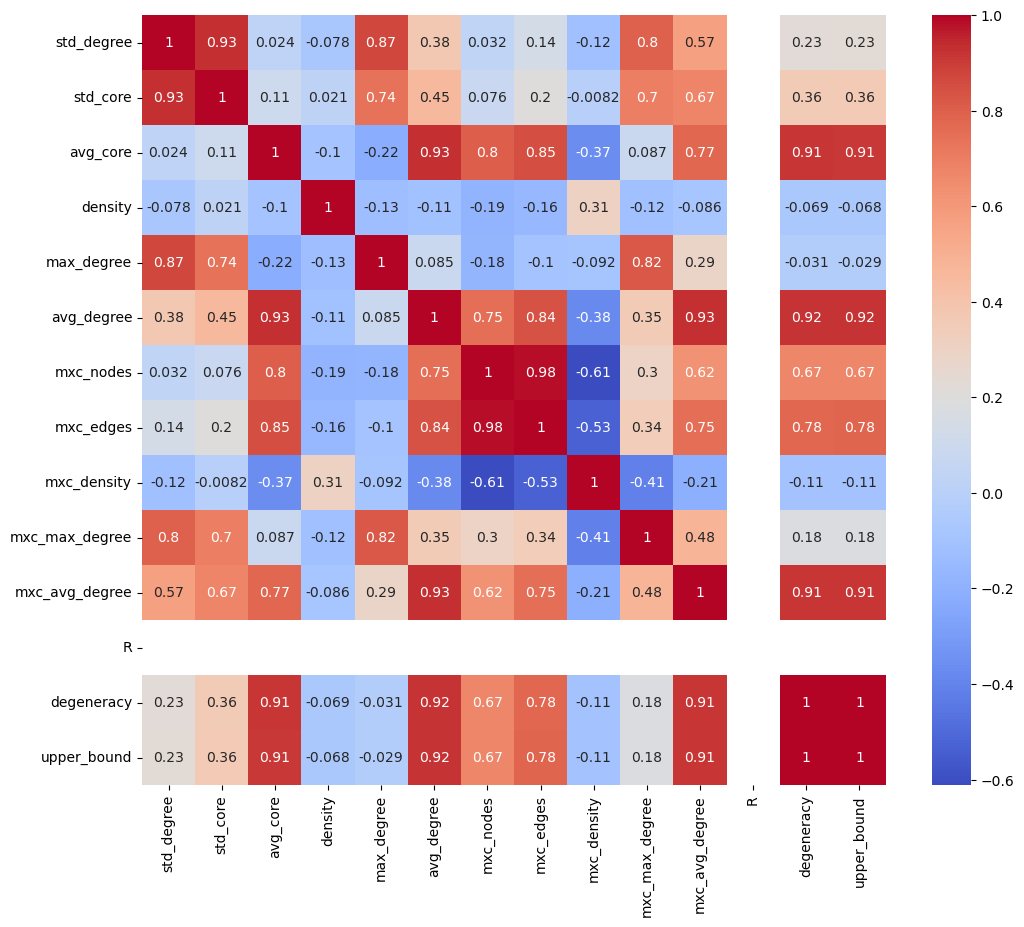

In [356]:
corr_matrix = X_train.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [357]:
y_bin = (y_train == 5).astype(int) 
feature_corr = X_train.corrwith(y_bin)
print(feature_corr.sort_values(ascending=False))

mxc_density       0.027809
max_degree       -0.040724
density          -0.051737
mxc_max_degree   -0.076346
mxc_nodes        -0.077996
mxc_edges        -0.103249
std_core         -0.117173
std_degree       -0.119134
avg_core         -0.121618
upper_bound      -0.128217
degeneracy       -0.128467
avg_degree       -0.154730
mxc_avg_degree   -0.171739
R                      NaN
dtype: float64


In [358]:
y_bin = (y_train == 6).astype(int) 
feature_corr = X_train.corrwith(y_bin)
print(feature_corr.sort_values(ascending=False))

upper_bound       0.053277
degeneracy        0.053254
mxc_density       0.048423
mxc_avg_degree    0.046584
avg_core          0.019173
avg_degree        0.010775
std_degree        0.010376
max_degree        0.009172
mxc_edges         0.002610
std_core         -0.012701
mxc_nodes        -0.014571
mxc_max_degree   -0.034958
density          -0.073522
R                      NaN
dtype: float64


In [359]:
y_bin = (y_train == 7).astype(int) 
feature_corr = X_train.corrwith(y_bin)
print(feature_corr.sort_values(ascending=False))

density           0.220653
mxc_nodes         0.059803
mxc_edges         0.041315
avg_core          0.016558
avg_degree       -0.017202
upper_bound      -0.025885
degeneracy       -0.026310
mxc_density      -0.027319
mxc_avg_degree   -0.051742
std_core         -0.065286
mxc_max_degree   -0.074405
std_degree       -0.120348
max_degree       -0.150539
R                      NaN
dtype: float64


In [360]:
y_bin = (y_train == 8).astype(int) 
feature_corr = X_train.corrwith(y_bin)
print(feature_corr.sort_values(ascending=False))

std_degree        0.199789
std_core          0.171582
mxc_max_degree    0.164754
max_degree        0.158730
mxc_avg_degree    0.151762
avg_degree        0.140309
degeneracy        0.085380
upper_bound       0.084767
avg_core          0.073907
mxc_edges         0.051738
mxc_nodes         0.029611
mxc_density      -0.045935
density          -0.078704
R                      NaN
dtype: float64


In [361]:
# ===============================
# OVR + SMOTE + Feature Selection + Balanced Bagging
# ===============================

from imblearn.over_sampling import SMOTE
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, classification_report
import pandas as pd

# ------------------------------
# Define base model
# ------------------------------
base_model = DecisionTreeClassifier()

# Classes
classes = [5, 6, 7, 8]

# Storage for results
ovr_pipeline_results = []

# ------------------------------
# Pipeline per class
# ------------------------------
for ordering in classes:
    print(f"\n==== Processing OVR for label = {ordering} ====")
    
    # ------------------------------
    # One-vs-Rest labels
    # ------------------------------
    y_train_bin = (y_train == ordering).astype(int)
    y_test_bin = (y_test == ordering).astype(int)
    
    # ------------------------------
    # Feature correlation selection (train only)
    # ------------------------------
    feature_corr = X_train.corrwith(y_train_bin)
    top_features = feature_corr.abs().sort_values(ascending=False).head(3).index
    print(f"Top features for class {ordering}: {list(top_features)}")
    
    X_train_sel = X_train[top_features]
    X_test_sel = X_test[top_features]
    
    # ------------------------------
    # Apply SMOTE only on training set
    # ------------------------------
    smote = SMOTE(random_state=42)
    X_train_res, y_train_res = smote.fit_resample(X_train_sel, y_train_bin)
    
    # ------------------------------
    # Balanced Bagging
    # ------------------------------
    bbag_clf = BalancedBaggingClassifier(
        estimator=base_model,
        n_estimators=50,
        replacement=True,
        random_state=42,
        n_jobs=1  # use 1 to avoid multiprocessing issues
    )
    bbag_clf.fit(X_train_res, y_train_res)
    
    # ------------------------------
    # Evaluate
    # ------------------------------
    y_pred = bbag_clf.predict(X_test_sel)
    y_prob = bbag_clf.predict_proba(X_test_sel)[:,1]
    
    acc = accuracy_score(y_test_bin, y_pred)
    f1 = f1_score(y_test_bin, y_pred)
    precision = precision_score(y_test_bin, y_pred)
    recall = recall_score(y_test_bin, y_pred)
    auc_roc = roc_auc_score(y_test_bin, y_prob)
    
    print(classification_report(y_test_bin, y_pred, digits=4))
    
    ovr_pipeline_results.append({
        "Ordering (l)": ordering,
        "Top Features": list(top_features),
        "Accuracy": acc,
        "F1-score": f1,
        "Precision": precision,
        "Recall": recall,
        "AUC-ROC": auc_roc
    })




==== Processing OVR for label = 5 ====
Top features for class 5: ['mxc_avg_degree', 'avg_degree', 'degeneracy']
              precision    recall  f1-score   support

           0     0.8163    0.8163    0.8163        49
           1     0.1818    0.1818    0.1818        11

    accuracy                         0.7000        60
   macro avg     0.4991    0.4991    0.4991        60
weighted avg     0.7000    0.7000    0.7000        60


==== Processing OVR for label = 6 ====
Top features for class 6: ['density', 'upper_bound', 'degeneracy']
              precision    recall  f1-score   support

           0     0.7838    0.6591    0.7160        44
           1     0.3478    0.5000    0.4103        16

    accuracy                         0.6167        60
   macro avg     0.5658    0.5795    0.5632        60
weighted avg     0.6675    0.6167    0.6345        60


==== Processing OVR for label = 7 ====
Top features for class 7: ['density', 'max_degree', 'std_degree']
              precis

In [362]:
# ------------------------------
# Summary
# ------------------------------
ovr_pipeline_df = pd.DataFrame(ovr_pipeline_results)
print("\n=== OVR + SMOTE + Feature Selection + Balanced Bagging Summary ===")
print(ovr_pipeline_df)


=== OVR + SMOTE + Feature Selection + Balanced Bagging Summary ===
   Ordering (l)                              Top Features  Accuracy  F1-score  \
0             5  [mxc_avg_degree, avg_degree, degeneracy]  0.700000  0.181818   
1             6        [density, upper_bound, degeneracy]  0.616667  0.410256   
2             7         [density, max_degree, std_degree]  0.616667  0.080000   
3             8    [std_degree, std_core, mxc_max_degree]  0.583333  0.444444   

   Precision    Recall   AUC-ROC  
0   0.181818  0.181818  0.455473  
1   0.347826  0.500000  0.555398  
2   0.083333  0.076923  0.486907  
3   0.400000  0.500000  0.659375  


In [364]:
# ===============================
# OVR + SMOTE + Balanced Bagging (Selected Features)
# ===============================

from imblearn.over_sampling import SMOTE
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, classification_report
import pandas as pd
# import joblib

# ------------------------------
# Select features
# ------------------------------
selected_features = [
    "std_degree",
    "std_core",
    "mxc_max_degree",
    "max_degree",
    "mxc_avg_degree",
    "avg_degree",
    "degeneracy",
    "upper_bound"
]

X_train_sel = X_train[selected_features]
X_test_sel = X_test[selected_features]

# ------------------------------
# Define base models
# ------------------------------
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_jobs=1),
    "Linear SVM": LinearSVC(max_iter=3000),
    "Logistic Regression": LogisticRegression(max_iter=1000, n_jobs=1),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "CatBoost": CatBoostClassifier(verbose=0, thread_count=-1, loss_function='Logloss')
}

classes = [5, 6, 7, 8]
ovr_smote_bbag_results = []
# ovr_models = {}  # to save trained classifiers

for ordering in classes:
    print(f"\n==== Processing OVR for label = {ordering} ====")
    
    # One-vs-Rest labels
    y_train_bin = (y_train == ordering).astype(int)
    y_test_bin = (y_test == ordering).astype(int)
    
    # SMOTE on training set only
    smote = SMOTE(random_state=42)
    X_train_res, y_train_res = smote.fit_resample(X_train_sel, y_train_bin)
    
    # Try BalancedBaggingClassifier for each base model
    best_f1 = 0
    best_model_name = ""
    best_bbag_clf = None
    
    for name, base_model in models.items():
        bbag_clf = BalancedBaggingClassifier(
            estimator=base_model,
            n_estimators=50,
            replacement=True,
            random_state=42,
            n_jobs=1  # safe for pickling
        )
        bbag_clf.fit(X_train_res, y_train_res)
        y_pred = bbag_clf.predict(X_test_sel)
        f1 = f1_score(y_test_bin, y_pred)
        
        if f1 > best_f1:
            best_f1 = f1
            best_model_name = name
            best_bbag_clf = bbag_clf
    
    # Evaluate best model
    y_pred_best = best_bbag_clf.predict(X_test_sel)
    y_prob_best = best_bbag_clf.predict_proba(X_test_sel)[:,1]  # for AUC
    
    acc = accuracy_score(y_test_bin, y_pred_best)
    f1 = f1_score(y_test_bin, y_pred_best)
    precision = precision_score(y_test_bin, y_pred_best)
    recall = recall_score(y_test_bin, y_pred_best)
    auc_roc = roc_auc_score(y_test_bin, y_prob_best)
    
    print(f"\nBest model for label {ordering}: {best_model_name}")
    print(classification_report(y_test_bin, y_pred_best, digits=4))
    
    # Save results
    ovr_smote_bbag_results.append({
        "Ordering (l)": ordering,
        "Best Model": best_model_name,
        "Accuracy": acc,
        "F1-score": f1,
        "Precision": precision,
        "Recall": recall,
        "AUC-ROC": auc_roc
    })
    
#     ovr_models[ordering] = best_bbag_clf
#     joblib.dump(best_bbag_clf, f"ovr_label_{ordering}_bbag.pkl")



==== Processing OVR for label = 5 ====

Best model for label 5: Decision Tree
              precision    recall  f1-score   support

           0     0.8667    0.7959    0.8298        49
           1     0.3333    0.4545    0.3846        11

    accuracy                         0.7333        60
   macro avg     0.6000    0.6252    0.6072        60
weighted avg     0.7689    0.7333    0.7482        60


==== Processing OVR for label = 6 ====

Best model for label 6: Logistic Regression
              precision    recall  f1-score   support

           0     0.8108    0.6818    0.7407        44
           1     0.3913    0.5625    0.4615        16

    accuracy                         0.6500        60
   macro avg     0.6011    0.6222    0.6011        60
weighted avg     0.6989    0.6500    0.6663        60


==== Processing OVR for label = 7 ====

Best model for label 7: Logistic Regression
              precision    recall  f1-score   support

           0     0.8182    0.5745    0.675

In [365]:
summary_df = pd.DataFrame(ovr_smote_bbag_results)
print("\n=== OVR + SMOTE + Balanced Bagging Summary ===")
print(summary_df)


=== OVR + SMOTE + Balanced Bagging Summary ===
   Ordering (l)           Best Model  Accuracy  F1-score  Precision    Recall  \
0             5        Decision Tree  0.733333  0.384615   0.333333  0.454545   
1             6  Logistic Regression  0.650000  0.461538   0.391304  0.562500   
2             7  Logistic Regression  0.566667  0.350000   0.259259  0.538462   
3             8        Random Forest  0.683333  0.577778   0.520000  0.650000   

    AUC-ROC  
0  0.630798  
1  0.643466  
2  0.548282  
3  0.726250  


# taking best_label among time_1 to time_8

In [431]:
file_path_2="/home/ara2/Desktop/Najifa_Arif_CSE491/Final_feature_matrix.csv"
df_2=pd.read_csv(file_path_2)
df_2.tail()

,grh_name(synthetic),std_degree,std_core,avg_core,nodes,density,max_degree,avg_degree,mxc_std_degree,mxc_nodes,...,edge,sub_edge,time_1,time_2,time_3,time_4,time_5,time_6,time_7,time_8
221,as19991122_remapped,17.557157,0.169385,2.029390,12113,0.000330,1396,3.999505,18.497933,357,...,24226,24223,0.13,0.14,0.15,0.13,0.15,0.12,0.11,0.16
222,as19991204_remapped,17.758524,0.162718,2.027045,12202,0.000328,1414,3.999508,17.781652,331,...,24404,24401,0.14,0.16,0.17,0.17,0.17,0.14,0.13,0.16
223,as19991205_remapped,17.772972,0.123678,2.015368,12168,0.000329,1412,3.999507,13.237984,188,...,24336,24333,0.16,0.15,0.16,0.15,0.15,0.15,0.12,0.13
224,as19991206_remapped,17.774585,0.123389,2.015295,12226,0.000327,1417,3.999509,13.237984,188,...,24452,24449,0.16,0.16,0.16,0.16,0.14,0.13,0.14,0.15
225,as20000102_remapped,18.038514,0.161074,2.026487,12572,0.000318,1460,3.999523,17.865763,334,...,25144,25141,0.14,0.17,0.16,0.12,0.14,0.16,0.14,0.14


In [435]:
df_class_2 = df_2.copy()

def best_ordering_2(row):
    subset={f"l={i}":row[f"time_{i}"] for i in range(1,9)}
    return min(subset, key=subset.get).replace("l=","")

df_class_2["best_label"]=df_class_2.apply(best_ordering_2, axis=1).astype(int)

In [436]:
df_class_2.head()

,grh_name(synthetic),std_degree,std_core,avg_core,nodes,density,max_degree,avg_degree,mxc_std_degree,mxc_nodes,...,sub_edge,time_1,time_2,time_3,time_4,time_5,time_6,time_7,time_8,best_label
0,scale_free_graph_m_21,35.627469,4.481167,11.176208,100001,0.000220,2064,21.95848,36.313664,38914,...,1094751,13.46,13.23,10.40,12.27,13.14,13.29,14.07,12.04,3
1,scale_free_graph_m_22,36.569533,4.760552,11.812692,100001,0.000231,2294,23.05290,36.793856,34571,...,1149598,10.31,9.91,11.60,11.64,10.30,9.60,12.06,11.25,6
2,scale_free_graph_m_23,37.870138,4.971670,12.317157,100001,0.000240,1869,24.01830,36.440907,21710,...,1198092,11.63,10.05,11.17,11.31,10.78,10.35,11.56,10.17,2
3,scale_free_graph_m_24,40.186277,5.078082,12.710503,100001,0.000250,2929,25.00754,21.032882,427,...,1247617,18.92,18.96,19.78,17.63,18.04,17.96,15.72,16.85,7
4,scale_free_graph_m_25_2nd_time,42.637274,5.363944,13.305678,200001,0.000130,3407,26.00868,43.207664,67449,...,2595685,46.72,40.69,47.48,48.22,48.74,45.87,49.70,40.67,8


In [437]:
skewed_feats = ['nodes','max_degree','mxc_nodes','mxc_edges','mxc_max_degree','edge','sub_edge']
# skewed_feats = ['std_degree','std_core','avg_core','density','max_degree','avg_degree','mxc_nodes', 
#                 'mxc_edges', 'mxc_density',
#                 'mxc_max_degree', 'mxc_avg_degree', 'R',
#                 'degeneracy', 'upper_bound']
df_class_2[skewed_feats] = df_class_2[skewed_feats].apply(lambda x: np.log1p(x))

In [438]:
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler

# scaler = RobustScaler()
# scaler = MinMaxScaler()
scaler = StandardScaler()

features_to_trnsfrm = df_class_2.columns.drop(['grh_name(synthetic)', 'best_label'])

df_class_2[features_to_trnsfrm] = scaler.fit_transform(df_class_2[features_to_trnsfrm])


In [439]:
ranges_4 = df_class_2[['nodes','max_degree','mxc_nodes','mxc_edges','mxc_max_degree','edge','sub_edge']].describe().loc[['min','max']]
print(ranges_4)

        nodes  max_degree  mxc_nodes  mxc_edges  mxc_max_degree      edge  \
min -3.989300   -2.027657  -1.988432  -2.118867       -1.988918 -3.119309   
max  2.836117    1.218361   1.997431   1.227847        1.681771  1.356254   

     sub_edge  
min -3.088141  
max  1.351967  


In [440]:
synth_df_2 = df_class_2.loc[:145]
real_df_2 = df_class_2.loc[146:]

In [441]:
synth_df_2.head()

,grh_name(synthetic),std_degree,std_core,avg_core,nodes,density,max_degree,avg_degree,mxc_std_degree,mxc_nodes,...,sub_edge,time_1,time_2,time_3,time_4,time_5,time_6,time_7,time_8,best_label
0,scale_free_graph_m_21,0.192773,0.271699,-0.491867,-0.159990,-0.098975,0.634759,-0.319042,0.422749,0.459701,...,-0.035474,-0.429361,-0.429518,-0.428565,-0.429607,-0.425681,-0.426775,-0.430936,-0.430039,3
1,scale_free_graph_m_22,0.226191,0.344912,-0.439479,-0.159990,-0.096425,0.686484,-0.255673,0.440831,0.425577,...,-0.014770,-0.429572,-0.429740,-0.428484,-0.429650,-0.425877,-0.427033,-0.431077,-0.430096,6
2,scale_free_graph_m_23,0.272326,0.400236,-0.397957,-0.159990,-0.094338,0.586174,-0.199774,0.427541,0.291423,...,0.002730,-0.429484,-0.429731,-0.428513,-0.429673,-0.425844,-0.426981,-0.431113,-0.430173,2
3,scale_free_graph_m_24,0.354485,0.428121,-0.365582,-0.159990,-0.092019,0.806128,-0.142495,-0.152663,-0.840830,...,0.019884,-0.428994,-0.429133,-0.427925,-0.429239,-0.425344,-0.426448,-0.430819,-0.429696,7
4,scale_free_graph_m_25_2nd_time,0.441428,0.503031,-0.316594,0.257365,-0.119843,0.880149,-0.084526,0.682349,0.618304,...,0.330165,-0.427124,-0.427677,-0.426035,-0.427137,-0.423233,-0.424494,-0.428424,-0.427996,8


In [442]:
real_df_2.head()

,grh_name(synthetic),std_degree,std_core,avg_core,nodes,density,max_degree,avg_degree,mxc_std_degree,mxc_nodes,...,sub_edge,time_1,time_2,time_3,time_4,time_5,time_6,time_7,time_8,best_label
146,176bit_LCC_remapped,1.987974,-0.784174,-0.434912,-1.724262,0.538421,0.967579,-0.311316,2.271921,-0.047440,...,-1.132007,-0.429792,-0.429906,-0.428805,-0.429972,-0.426061,-0.427211,-0.431413,-0.430396,3
147,3D_28984_Tetra_LCC_remapped,-0.015399,-0.789409,-0.267255,-0.905649,0.009305,0.935663,-0.437101,0.200704,0.360807,...,-0.600009,-0.428829,-0.428978,-0.427729,-0.428908,-0.425145,-0.426099,-0.430418,-0.429247,5
148,598a_LCC_remapped,-0.967606,-0.770831,-0.791366,-0.097311,-0.122162,-1.489550,-0.816245,-0.838638,0.583836,...,-0.200234,-0.430163,-0.430300,-0.429169,-0.430340,-0.426479,-0.427597,-0.431820,-0.430783,1
149,CA-CondMat_cleaned_LCC_remapped,-0.684071,-0.034901,-0.990684,-1.089332,-0.057240,-0.343919,-1.095669,-0.944676,-1.637666,...,-1.095856,-0.253755,-0.260803,-0.253839,-0.254693,-0.243012,-0.248990,-0.248938,-0.245411,2
150,CA-HepTh_cleaned_LCC_remapped,-0.842193,-0.148173,-1.131337,-1.634468,0.004204,-1.051754,-1.257968,-0.944676,-1.579799,...,-1.667282,0.766893,0.767558,0.780356,0.777079,0.766581,0.824815,0.826052,0.823484,5


In [443]:
real_train_2, real_test_2 = train_test_split(
        real_df_2,
        test_size = 0.2,
        random_state=20,
        stratify=real_df_2['best_label']
)
synth_train_2, synth_test_2 = train_test_split(
    synth_df_2,
    test_size = 0.2,
    random_state=20,
    stratify=synth_df_2['best_label']
)

In [444]:
print(f"real_train: {real_train_2.shape}\n"
      f"real_test: {real_test_2.shape}\n"
      f"synth_train: {synth_train_2.shape}\n"
      f"synth_test: {synth_test_2.shape}")

real_train: (64, 29)
real_test: (16, 29)
synth_train: (116, 29)
synth_test: (30, 29)


In [445]:
print("Real Train label distribution:")
print(real_train_2['best_label'].value_counts().sort_index())

print("\nReal Test label distribution:")
print(real_test_2['best_label'].value_counts().sort_index())

print("\nSynthetic Train label distribution:")
print(synth_train_2['best_label'].value_counts().sort_index())

print("\nSynthetic Test label distribution:")
print(synth_test_2['best_label'].value_counts().sort_index())

Real Train label distribution:
1    10
2    11
3    12
4     8
5     6
6     3
7     9
8     5
Name: best_label, dtype: int64

Real Test label distribution:
1    3
2    3
3    3
4    2
5    1
6    1
7    2
8    1
Name: best_label, dtype: int64

Synthetic Train label distribution:
1     6
2    10
3    14
4    17
5     9
6    17
7    14
8    29
Name: best_label, dtype: int64

Synthetic Test label distribution:
1    2
2    2
3    3
4    5
5    2
6    5
7    3
8    8
Name: best_label, dtype: int64


In [446]:
train_df_2 = pd.concat([real_train_2, synth_train_2], ignore_index = True)
test_df_2 = pd.concat([real_test_2, synth_test_2], ignore_index=True)

In [447]:
print(f"train_df: {train_df_2.shape},'\ntest_df: {test_df_2.shape}'")

train_df: (180, 29),'
test_df: (46, 29)'


In [453]:
# 'std_degree','std_core','avg_core','nodes','density','max_degree','avg_degree','mxc_nodes', 'mxc_edges', 
# 'mxc_density','mxc_max_degree', 'mxc_avg_degree', 'R', 'min_core',
# 'degeneracy', 'upper_bound', 'edge', 'sub_edge', 'best_label'

feature_cols_2 = ['std_degree','std_core','avg_core','density','max_degree','avg_degree','mxc_nodes', 
                'mxc_edges', 'mxc_density',
                'mxc_max_degree', 'mxc_avg_degree', 'R',
                'degeneracy', 'upper_bound']

X_train_2 = train_df_2[feature_cols_2]
y_train_2 = train_df_2['best_label']

X_test_2 = test_df_2[feature_cols]
y_test_2 = test_df_2['best_label']

print(f"X_train: {X_train_2.shape},'\n'X_test: {X_test_2.shape}")

X_train: (180, 14),'
'X_test: (46, 14)


In [448]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, classification_report, confusion_matrix, RocCurveDisplay
from sklearn.preprocessing import label_binarize

In [460]:
models_2 = {
    "Decision Tree": DecisionTreeClassifier(class_weight='balanced'),
    "Random Forest": RandomForestClassifier(class_weight='balanced'),
    "SVM": SVC(class_weight='balanced',probability=True),
    "Linear SVM": LinearSVC(class_weight='balanced', max_iter=3000),
    "Logistic Regression": LogisticRegression(class_weight='balanced', max_iter=1000),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "CatBoost": CatBoostClassifier(verbose=0)
}


==== Training OVR for label = 1 ====

Decision Tree Report for label=1:
              precision    recall  f1-score   support

           0     0.9268    0.9268    0.9268        41
           1     0.4000    0.4000    0.4000         5

    accuracy                         0.8696        46
   macro avg     0.6634    0.6634    0.6634        46
weighted avg     0.8696    0.8696    0.8696        46


Random Forest Report for label=1:
              precision    recall  f1-score   support

           0     0.8913    1.0000    0.9425        41
           1     0.0000    0.0000    0.0000         5

    accuracy                         0.8913        46
   macro avg     0.4457    0.5000    0.4713        46
weighted avg     0.7944    0.8913    0.8401        46


SVM Report for label=1:
              precision    recall  f1-score   support

           0     0.9375    0.7317    0.8219        41
           1     0.2143    0.6000    0.3158         5

    accuracy                         0.7174      

/home/ara2/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)



CatBoost Report for label=1:
              precision    recall  f1-score   support

           0     0.8913    1.0000    0.9425        41
           1     0.0000    0.0000    0.0000         5

    accuracy                         0.8913        46
   macro avg     0.4457    0.5000    0.4713        46
weighted avg     0.7944    0.8913    0.8401        46



<Figure size 640x480 with 0 Axes>

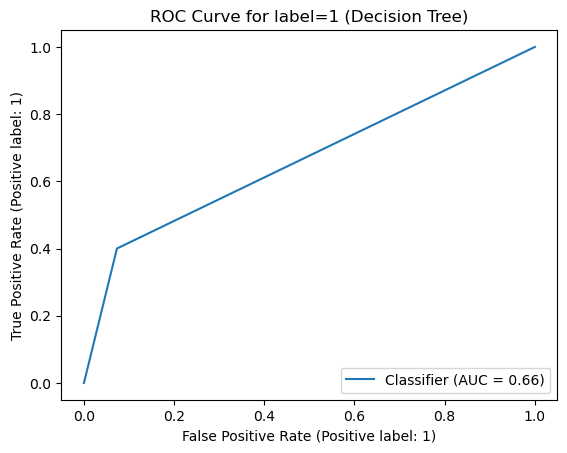


==== Training OVR for label = 2 ====

Decision Tree Report for label=2:
              precision    recall  f1-score   support

           0     0.8864    0.9512    0.9176        41
           1     0.0000    0.0000    0.0000         5

    accuracy                         0.8478        46
   macro avg     0.4432    0.4756    0.4588        46
weighted avg     0.7900    0.8478    0.8179        46


Random Forest Report for label=2:
              precision    recall  f1-score   support

           0     0.8889    0.9756    0.9302        41
           1     0.0000    0.0000    0.0000         5

    accuracy                         0.8696        46
   macro avg     0.4444    0.4878    0.4651        46
weighted avg     0.7923    0.8696    0.8291        46


SVM Report for label=2:
              precision    recall  f1-score   support

           0     0.8214    0.5610    0.6667        41
           1     0.0000    0.0000    0.0000         5

    accuracy                         0.5000      

/home/ara2/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)



CatBoost Report for label=2:
              precision    recall  f1-score   support

           0     0.8913    1.0000    0.9425        41
           1     0.0000    0.0000    0.0000         5

    accuracy                         0.8913        46
   macro avg     0.4457    0.5000    0.4713        46
weighted avg     0.7944    0.8913    0.8401        46


==== Training OVR for label = 3 ====

Decision Tree Report for label=3:
              precision    recall  f1-score   support

           0     0.8684    0.8250    0.8462        40
           1     0.1250    0.1667    0.1429         6

    accuracy                         0.7391        46
   macro avg     0.4967    0.4958    0.4945        46
weighted avg     0.7715    0.7391    0.7544        46


Random Forest Report for label=3:
              precision    recall  f1-score   support

           0     0.8636    0.9500    0.9048        40
           1     0.0000    0.0000    0.0000         6

    accuracy                         0.8261 

/home/ara2/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/ara2/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)



CatBoost Report for label=3:
              precision    recall  f1-score   support

           0     0.8636    0.9500    0.9048        40
           1     0.0000    0.0000    0.0000         6

    accuracy                         0.8261        46
   macro avg     0.4318    0.4750    0.4524        46
weighted avg     0.7510    0.8261    0.7867        46



<Figure size 640x480 with 0 Axes>

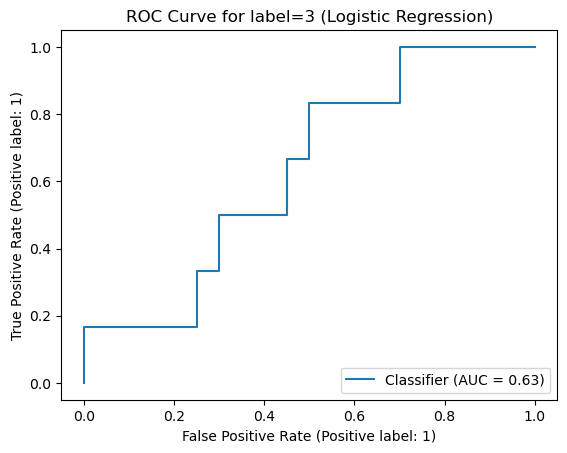


==== Training OVR for label = 4 ====

Decision Tree Report for label=4:
              precision    recall  f1-score   support

           0     0.8409    0.9487    0.8916        39
           1     0.0000    0.0000    0.0000         7

    accuracy                         0.8043        46
   macro avg     0.4205    0.4744    0.4458        46
weighted avg     0.7129    0.8043    0.7559        46


Random Forest Report for label=4:
              precision    recall  f1-score   support

           0     0.8478    1.0000    0.9176        39
           1     0.0000    0.0000    0.0000         7

    accuracy                         0.8478        46
   macro avg     0.4239    0.5000    0.4588        46
weighted avg     0.7188    0.8478    0.7780        46


SVM Report for label=4:
              precision    recall  f1-score   support

           0     0.7812    0.6410    0.7042        39
           1     0.0000    0.0000    0.0000         7

    accuracy                         0.5435      

/home/ara2/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)



CatBoost Report for label=4:
              precision    recall  f1-score   support

           0     0.8478    1.0000    0.9176        39
           1     0.0000    0.0000    0.0000         7

    accuracy                         0.8478        46
   macro avg     0.4239    0.5000    0.4588        46
weighted avg     0.7188    0.8478    0.7780        46



<Figure size 640x480 with 0 Axes>

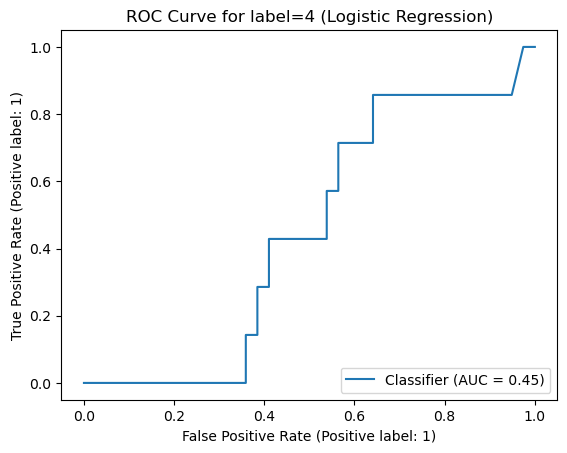


==== Training OVR for label = 5 ====

Decision Tree Report for label=5:
              precision    recall  f1-score   support

           0     0.9318    0.9535    0.9425        43
           1     0.0000    0.0000    0.0000         3

    accuracy                         0.8913        46
   macro avg     0.4659    0.4767    0.4713        46
weighted avg     0.8710    0.8913    0.8811        46


Random Forest Report for label=5:
              precision    recall  f1-score   support

           0     0.9348    1.0000    0.9663        43
           1     0.0000    0.0000    0.0000         3

    accuracy                         0.9348        46
   macro avg     0.4674    0.5000    0.4831        46
weighted avg     0.8738    0.9348    0.9033        46


SVM Report for label=5:
              precision    recall  f1-score   support

           0     0.9200    0.5349    0.6765        43
           1     0.0476    0.3333    0.0833         3

    accuracy                         0.5217      

/home/ara2/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)



CatBoost Report for label=5:
              precision    recall  f1-score   support

           0     0.9348    1.0000    0.9663        43
           1     0.0000    0.0000    0.0000         3

    accuracy                         0.9348        46
   macro avg     0.4674    0.5000    0.4831        46
weighted avg     0.8738    0.9348    0.9033        46



<Figure size 640x480 with 0 Axes>

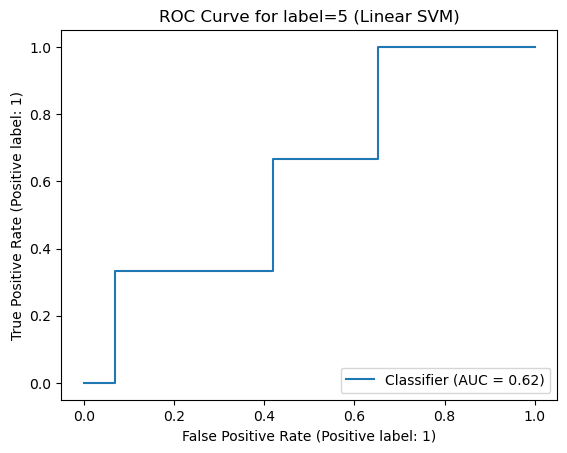


==== Training OVR for label = 6 ====

Decision Tree Report for label=6:
              precision    recall  f1-score   support

           0     0.8235    0.7000    0.7568        40
           1     0.0000    0.0000    0.0000         6

    accuracy                         0.6087        46
   macro avg     0.4118    0.3500    0.3784        46
weighted avg     0.7161    0.6087    0.6580        46


Random Forest Report for label=6:
              precision    recall  f1-score   support

           0     0.8667    0.9750    0.9176        40
           1     0.0000    0.0000    0.0000         6

    accuracy                         0.8478        46
   macro avg     0.4333    0.4875    0.4588        46
weighted avg     0.7536    0.8478    0.7980        46


SVM Report for label=6:
              precision    recall  f1-score   support

           0     0.9412    0.4000    0.5614        40
           1     0.1724    0.8333    0.2857         6

    accuracy                         0.4565      

/home/ara2/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)



CatBoost Report for label=6:
              precision    recall  f1-score   support

           0     0.8696    1.0000    0.9302        40
           1     0.0000    0.0000    0.0000         6

    accuracy                         0.8696        46
   macro avg     0.4348    0.5000    0.4651        46
weighted avg     0.7561    0.8696    0.8089        46



<Figure size 640x480 with 0 Axes>

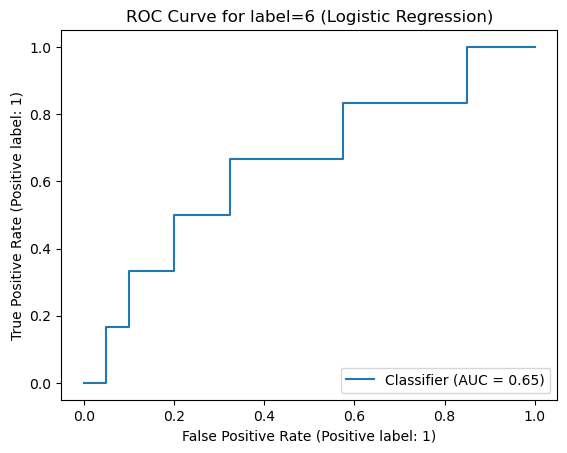


==== Training OVR for label = 7 ====

Decision Tree Report for label=7:
              precision    recall  f1-score   support

           0     0.9000    0.8780    0.8889        41
           1     0.1667    0.2000    0.1818         5

    accuracy                         0.8043        46
   macro avg     0.5333    0.5390    0.5354        46
weighted avg     0.8203    0.8043    0.8120        46


Random Forest Report for label=7:
              precision    recall  f1-score   support

           0     0.8889    0.9756    0.9302        41
           1     0.0000    0.0000    0.0000         5

    accuracy                         0.8696        46
   macro avg     0.4444    0.4878    0.4651        46
weighted avg     0.7923    0.8696    0.8291        46


SVM Report for label=7:
              precision    recall  f1-score   support

           0     0.8696    0.4878    0.6250        41
           1     0.0870    0.4000    0.1429         5

    accuracy                         0.4783      

/home/ara2/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)



CatBoost Report for label=7:
              precision    recall  f1-score   support

           0     0.9091    0.9756    0.9412        41
           1     0.5000    0.2000    0.2857         5

    accuracy                         0.8913        46
   macro avg     0.7045    0.5878    0.6134        46
weighted avg     0.8646    0.8913    0.8699        46



<Figure size 640x480 with 0 Axes>

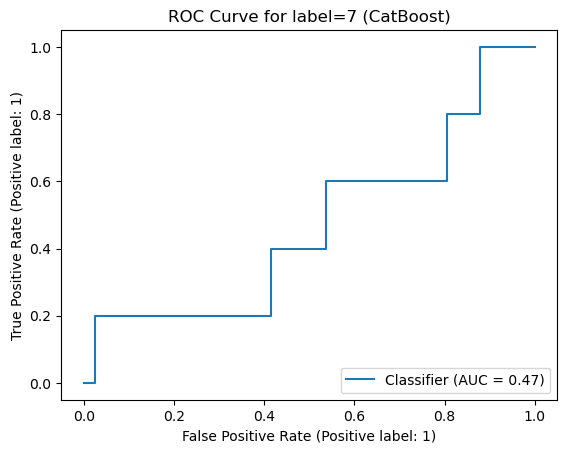


==== Training OVR for label = 8 ====

Decision Tree Report for label=8:
              precision    recall  f1-score   support

           0     0.8158    0.8378    0.8267        37
           1     0.2500    0.2222    0.2353         9

    accuracy                         0.7174        46
   macro avg     0.5329    0.5300    0.5310        46
weighted avg     0.7051    0.7174    0.7110        46


Random Forest Report for label=8:
              precision    recall  f1-score   support

           0     0.8780    0.9730    0.9231        37
           1     0.8000    0.4444    0.5714         9

    accuracy                         0.8696        46
   macro avg     0.8390    0.7087    0.7473        46
weighted avg     0.8628    0.8696    0.8543        46


SVM Report for label=8:
              precision    recall  f1-score   support

           0     0.9565    0.5946    0.7333        37
           1     0.3478    0.8889    0.5000         9

    accuracy                         0.6522      

/home/ara2/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)



CatBoost Report for label=8:
              precision    recall  f1-score   support

           0     0.8140    0.9459    0.8750        37
           1     0.3333    0.1111    0.1667         9

    accuracy                         0.7826        46
   macro avg     0.5736    0.5285    0.5208        46
weighted avg     0.7199    0.7826    0.7364        46



<Figure size 640x480 with 0 Axes>

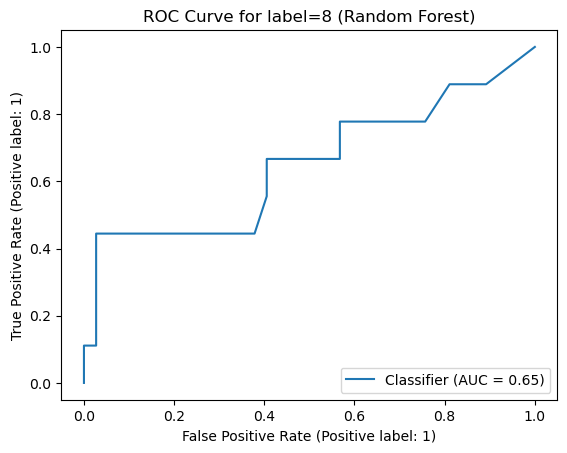

In [461]:
best_models = []

y_test_binarized = label_binarize(y_test, classes=[1,2,3,4,5,6,7,8])

for ordering in [1,2,3,4,5,6,7,8]:
    y_train_bin = (y_train_2 == ordering).astype(int)
    y_test_bin = (y_test_2 == ordering).astype(int)

    # Skip labels with only one class in train set
    if len(np.unique(y_train_bin)) < 2:
        print(f"\n⚠️ Skipping label {ordering}: only one class present in training data ({np.unique(y_train_bin)})")
        continue

    print(f"\n==== Training OVR for label = {ordering} ====")
    
    best_acc = best_f1 = best_precision = best_recall = best_auc = 0
    best_model_name = ""
    best_model_instance = None

    for name, model in models_2.items():
        model.fit(X_train_2, y_train_bin)

        y_pred = model.predict(X_test_2)

        # Handle probability or decision score
        if hasattr(model, "predict_proba"):
            y_score = model.predict_proba(X_test_2)
            if y_score.shape[1] == 2:
                y_score = y_score[:, 1]
            else:
                y_score = np.zeros_like(y_test_bin, dtype=float)
        elif hasattr(model, "decision_function"):
            y_score = model.decision_function(X_test_2)
        else:
            y_score = y_pred

        # Compute metrics safely
        acc = accuracy_score(y_test_bin, y_pred)
        f1 = f1_score(y_test_bin, y_pred, zero_division=0)
        precision = precision_score(y_test_bin, y_pred, zero_division=0)
        recall = recall_score(y_test_bin, y_pred, zero_division=0)
        try:
            auc = roc_auc_score(y_test_bin, y_score)
        except:
            auc = 0.0

        print(f"\n{name} Report for label={ordering}:")
        print(classification_report(y_test_bin, y_pred, digits=4, zero_division=0))

        if f1 > best_f1:
            best_acc = acc
            best_f1 = f1
            best_precision = precision
            best_recall = recall
            best_auc = auc
            best_model_name = name
            best_model_instance = model

    # Only append if a valid model was found
    if best_model_instance is not None:
        best_models.append({
            "Ordering (l)": ordering,
            "Best Model": best_model_name,
            "Accuracy": best_acc,
            "F1-score": best_f1,
            "Precision": best_precision,
            "Recall": best_recall,
            "AUC-ROC": best_auc
        })

        # Plot ROC curve for the best model
        plt.figure()
        if hasattr(best_model_instance, "predict_proba"):
            y_score = best_model_instance.predict_proba(X_test_2)
            if y_score.shape[1] == 2:
                y_score = y_score[:, 1]
            else:
                y_score = np.zeros_like(y_test_bin, dtype=float)
        elif hasattr(best_model_instance, "decision_function"):
            y_score = best_model_instance.decision_function(X_test_2)
        else:
            y_score = best_model_instance.predict(X_test_2)

        RocCurveDisplay.from_predictions(y_test_bin, y_score)
        plt.title(f"ROC Curve for label={ordering} ({best_model_name})")
        plt.show()


In [463]:
summary_df = pd.DataFrame(best_models)
print(summary_df)

   Ordering (l)           Best Model  Accuracy  F1-score  Precision    Recall  \
0             1        Decision Tree  0.869565  0.400000   0.400000  0.400000   
1             3  Logistic Regression  0.543478  0.275862   0.173913  0.666667   
2             4  Logistic Regression  0.565217  0.090909   0.066667  0.142857   
3             5           Linear SVM  0.608696  0.100000   0.058824  0.333333   
4             6  Logistic Regression  0.478261  0.294118   0.178571  0.833333   
5             7             CatBoost  0.891304  0.285714   0.500000  0.200000   
6             8        Random Forest  0.869565  0.571429   0.800000  0.444444   

    AUC-ROC  
0  0.663415  
1  0.633333  
2  0.448718  
3  0.620155  
4  0.650000  
5  0.468293  
6  0.647147  
